## __Develop a predictive model that assesses the claim probability for car insurance policies.__ 
__The objective would be to understand__
- the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.

### __Installing and Importing the required packages__

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# stat tools
import statsmodels.api as sm
from scipy.stats import kurtosis, skew

### __Information about the dataset::__


#### __Data Structure__
**Number of Rows:** 58,592 Nos
**Number of Columns:** 44 Nos
**Target Variable:** `is_claim` (Indicator of whether a claim has been made on this policy) [



#### __Feature Categories and Descriptions__

#### 1. Policy & Policyholder Details
- `policy_id`: Unique identifier for the insurance policy
- `policy_tenure`: Duration (in years) that the policy has been active
- `age_of_policyholder`: Age of the policyholder (in years)

#### 2. Geographic & Risk Features
- `area_cluster`: Cluster or group categorizing the area based on certain criteria (e.g., geographic region or risk level)
- `population_density`: Population density of the policyholder's residential area, which might affect risk level

#### 3. Car Specifications & Engine Details
- `age_of_car`: Age of the insured car (in years)
- `make`: Car manufacturer or brand
- `segment`: Car segment (e.g., Sedan, SUV) indicating the vehicle type
- `model`: Specific model of the car
- `fuel_type`: Type of fuel used by the car (e.g., petrol, diesel)
- `engine_type`: Type of engine in the car (e.g., V6, electric)
- `displacement`: Engine displacement, a measure of the engine’s size (usually in cc)
- `max_torque`: Maximum torque the car's engine can produce (usually measured in Nm)
- `max_power`: Maximum power output of the car's engine (typically measured in horsepower)
- `cylinder`: Number of cylinders in the car’s engine
- `rear_brakes_type`: Type of rear brakes on the car (e.g., drum, disc)

#### 4. Car Dimensions & Performance
- `transmission_type`: Type of transmission system (e.g., manual, automatic)
- `gear_box`: Number of gears in the car’s gearbox
- `steering_type`: Type of steering (e.g., power steering, manual steering)
- `turning_radius`: The car’s minimum turning radius, an indicator of maneuverability
- `length`: Length of the car (typically measured in millimeters)
- `width`: Width of the car (typically measured in millimeters)[
- `height`: Height of the car (typically measured in millimeters)
- `gross_weight`: Gross weight of the car, including passengers and cargo (usually in kg)

#### 5. Safety & Feature Indicators (Binary/Count)
- `ncap_rating`: Safety rating of the car according to NCAP
- `airbags`: Number of airbags in the car
- `is_esc`: Electronic Stability Control presence indicator
- `is_tpms`: Tire Pressure Monitoring System presence indicator
- `is_parking_sensors`: Parking sensors presence indicator
- `is_parking_camera`: Parking camera presence indicator
- `is_front_fog_lights`: Front fog lights presence indicator
- `is_brake_assist`: Brake assist feature presence indicator
- `is_power_door_locks`: Power door locks presence indicator
- `is_central_locking`: Central locking presence indicator
- `is_power_steering`: Power steering presence indicator
- `is_ecw`: Emergency Call Warning (ECW) presence indicator
- `is_speed_alert`: Speed alert system presence indicator
- `is_adjustable_steering`: Adjustable steering wheel indicator
- `is_driver_seat_height_adjustable`: Adjustable driver’s seat height indicator
- `is_day_night_rear_view_mirror`: Day/night rearview mirror presence indicator
- `is_rear_window_wiper`: Rear window wiper presence indicator
- `is_rear_window_washer`: Rear window washer presence indicator
- `is_rear_window_defogger`: Rear window defogger presence indicator


### __Downloading the dataset__

In [21]:
df = pd.read_csv('/Users/gullu/Desktop/capstone projects/interview selection project/Insurance claim probability /Data.csv')

In [23]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [25]:
df.shape

(58592, 44)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

### __Data Processing__

In [29]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

          Count  Percentage
is_claim                   
0         54844   93.603222
1          3748    6.396778


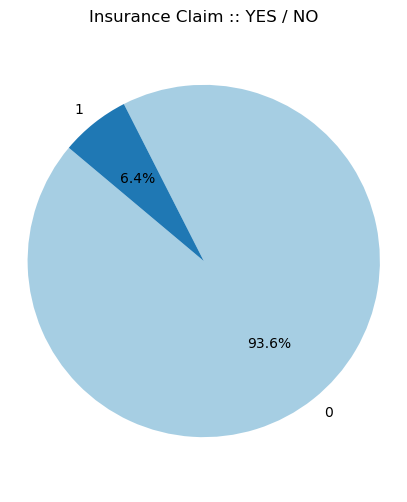

In [31]:
counts = df['is_claim'].value_counts()
percentages = df['is_claim'].value_counts(normalize = True) * 100

## Combining into dataframe
value_count_result = pd.DataFrame({'Count' : counts, 'Percentage' : percentages})
print(value_count_result)

## Plot pie chart
plt.figure(figsize = (5,6))
plt.pie(value_count_result['Count'], labels = value_count_result.index, autopct='%1.1f%%', startangle = 140, colors=plt.cm.Paired.colors)
plt.title('Insurance Claim :: YES / NO')
plt.axis('equal')
plt.show()

 - max_torque and max_power contain critical information but they are stored as object type. they must be changed into numerical columns.

In [33]:
df['max_torque'].value_counts()

max_torque
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: count, dtype: int64

In [35]:
df['max_power'].value_counts()

max_power
88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: count, dtype: int64

In [37]:
df['max_torque'] = df['max_torque'].str.extract('(\d+\.?\d*)').astype(float)
df['max_power'] = df['max_power'].str.extract('(\d+\.?\d*)').astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  float64
 11  max_power                         58592 non-null  float64
 12  engi

In [15]:
df['make'].value_counts()

make
1    38126
3    14018
2     2373
5     2114
4     1961
Name: count, dtype: int64

In [119]:
df['model'].value_counts()

model
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: count, dtype: int64

In [17]:
df['segment'].value_counts()

segment
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: count, dtype: int64

- the information carried by 'make' is very likely already captured by 'segment' column
- 'model' column has 11 unique values. One Hot Encoding will create 11 different columns. Also the detailed characteristics of the car model (power, size, weight, safety) are already captured across several other numerical features like max_torque, max_power, length, width, height, gross_weight, ncap_rating

So dropping 'make' and 'model' will make the feature space and model prediction simpler without losing its predictive power

In [41]:
df.drop(['policy_id','make','model'],axis = 1, inplace = True)

In [227]:
df['fuel_type'].value_counts()

fuel_type
Petrol    20532
CNG       20330
Diesel    17730
Name: count, dtype: int64

In [123]:
df['airbags'].value_counts()

airbags
2    40425
6    16958
1     1209
Name: count, dtype: int64

In [23]:
df['cylinder'].value_counts()

cylinder
4    36735
3    21857
Name: count, dtype: int64

In [24]:
df['gear_box'].value_counts()

gear_box
5    44211
6    14381
Name: count, dtype: int64

In [25]:
df['ncap_rating'].value_counts()

ncap_rating
2    21402
0    19097
3    14018
4     2114
5     1961
Name: count, dtype: int64

- 'airbags','cylinder','gear_box','ncap_rating' :: they are stored as integer type. but they are categorical feature.
   For example :: 'airbags':: Each car has 2 or 6 or 1  bag. So 2,6,1 resembles the category.
- 'airbags','cylinder','gear_box','ncap_rating' will be changed into object type for encoding

In [27]:
df['turning_radius'].value_counts()

turning_radius
4.60    14948
4.80    14856
5.20    14018
4.70     4173
5.00     3971
4.85     2940
4.90     2114
4.50     1209
5.10      363
Name: count, dtype: int64

Turning radius will remain integer type as it has 9 unique values which after encoding will add 9 columns and this will inturn complicate the model training.

In [229]:
df['is_claim'].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

In [43]:
### Converting 'airbags','cylinder','gear_box','ncap_rating' into object type
feats = ['airbags','cylinder','gear_box','ncap_rating']

for feat in feats:
    df[feat] = df[feat].astype('object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   segment                           58592 non-null  object 
 6   fuel_type                         58592 non-null  object 
 7   max_torque                        58592 non-null  float64
 8   max_power                         58592 non-null  float64
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  object 
 11  is_esc                            58592 non-null  object 
 12  is_a

## __EDA__

### __Univarient Analysis for Categorical feature__

In [47]:
cate_features = df.select_dtypes(include = object).columns
cate_features

Index(['area_cluster', 'segment', 'fuel_type', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

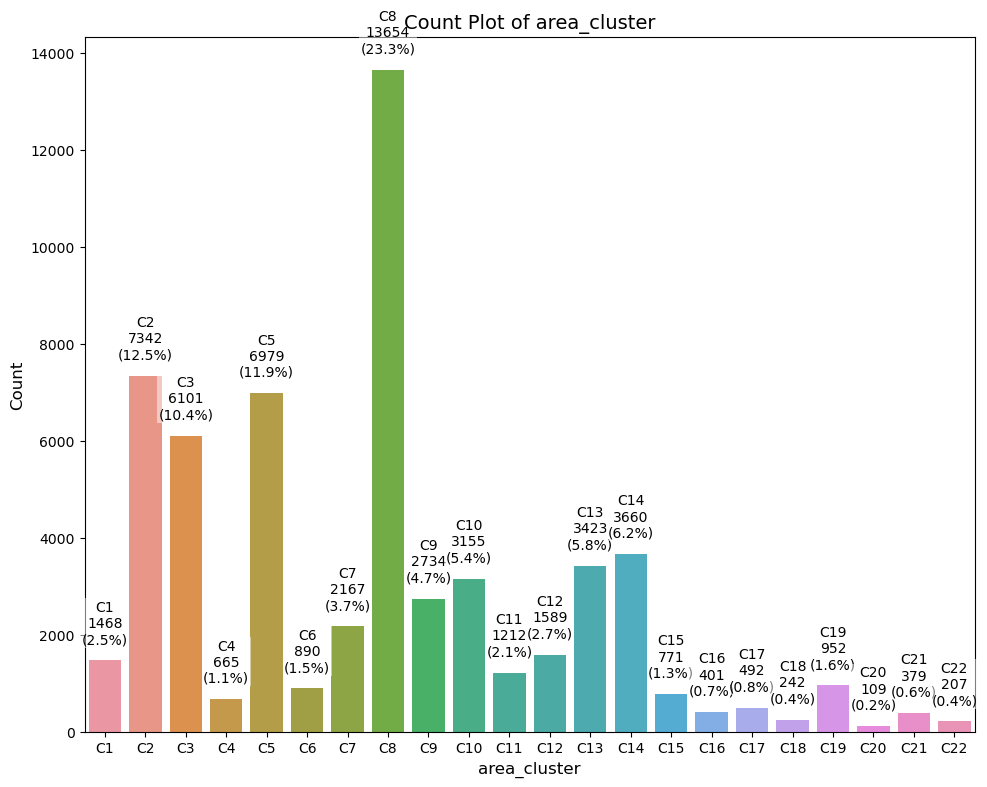

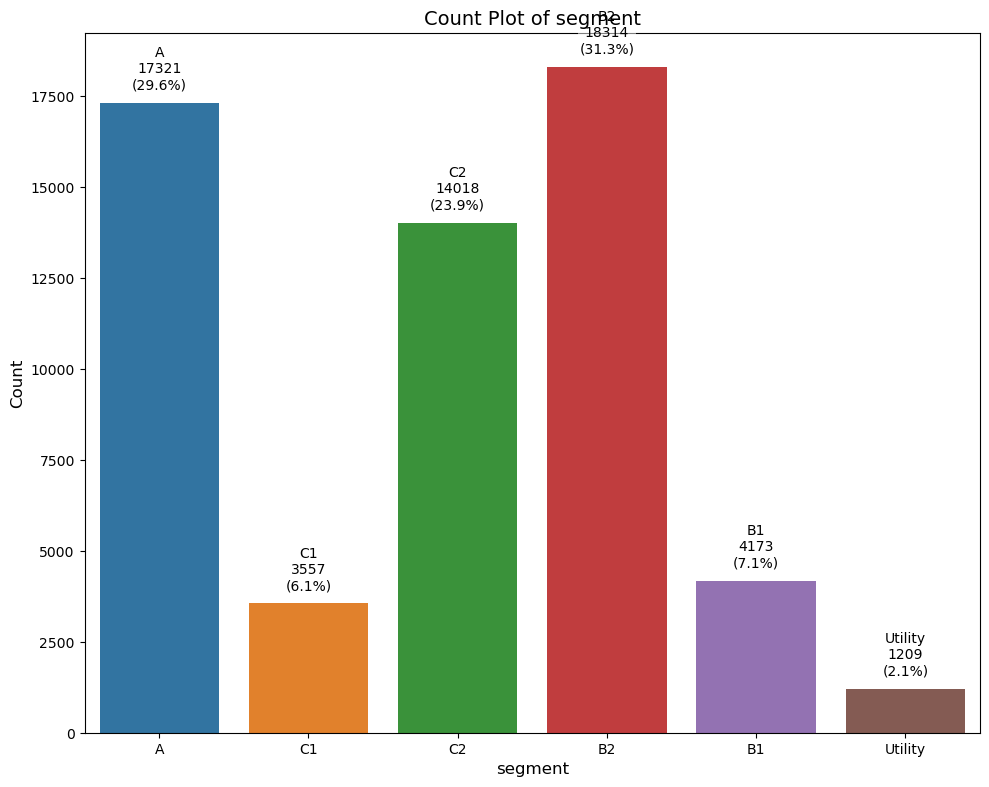

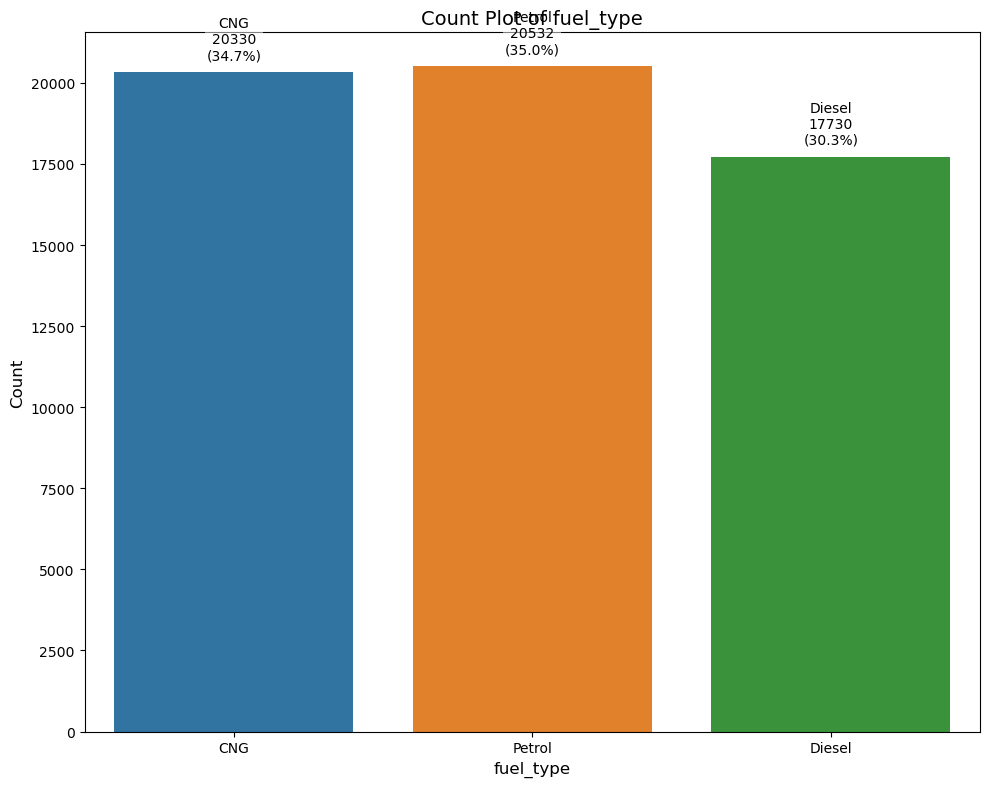

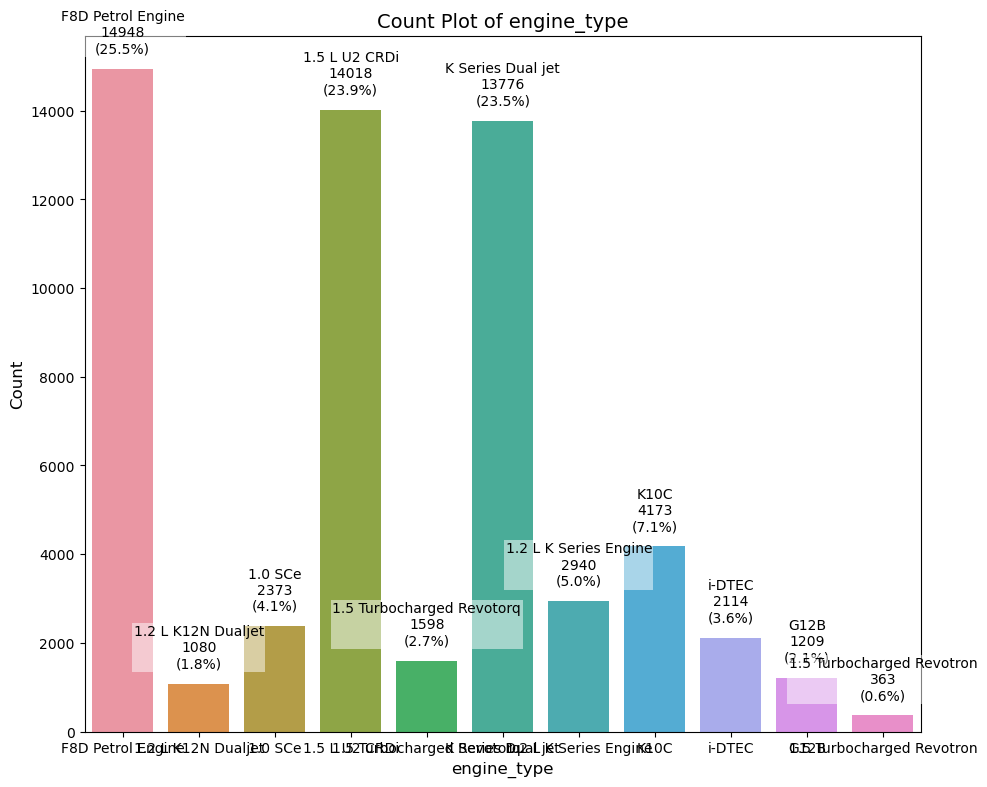

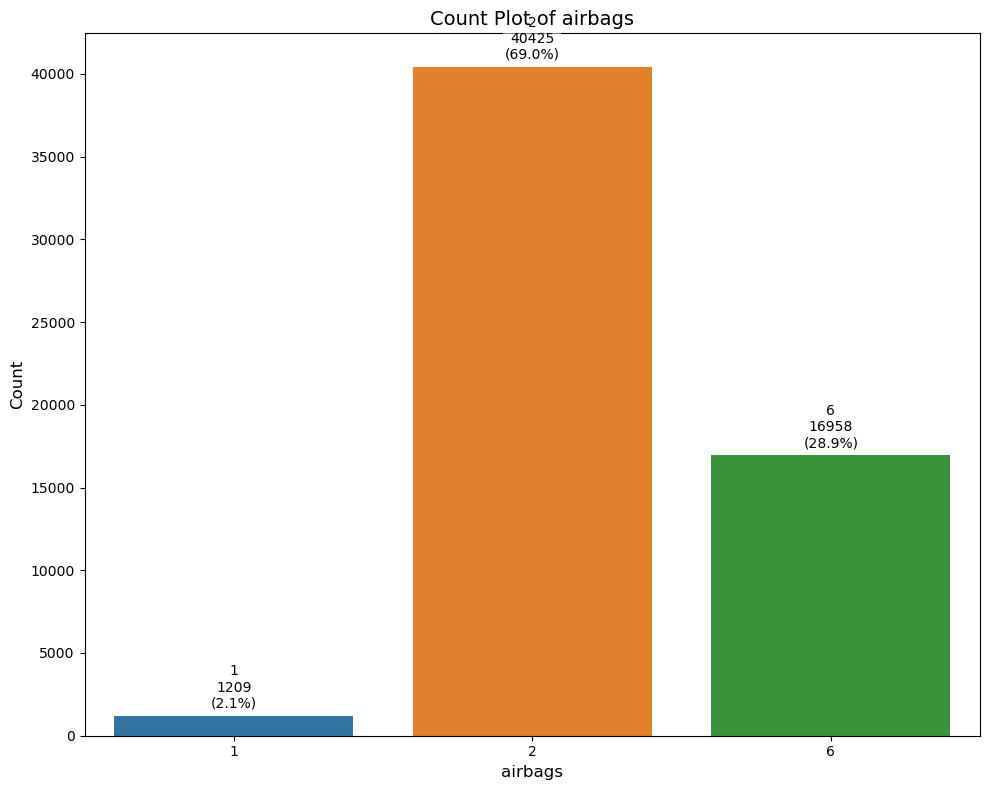

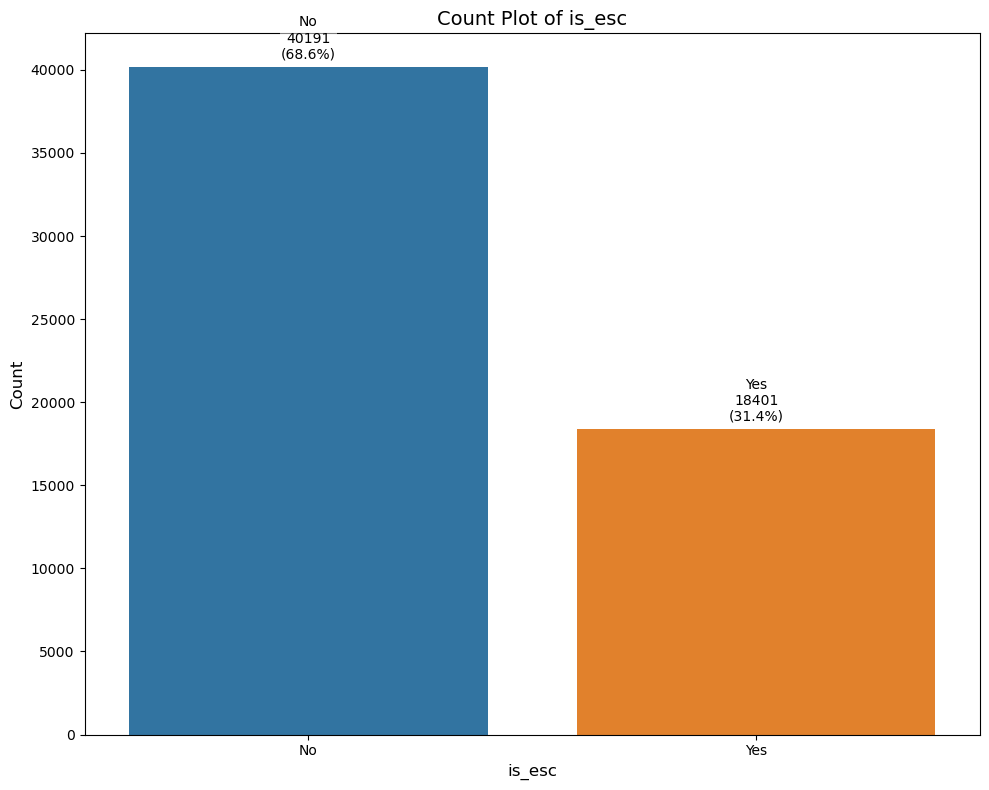

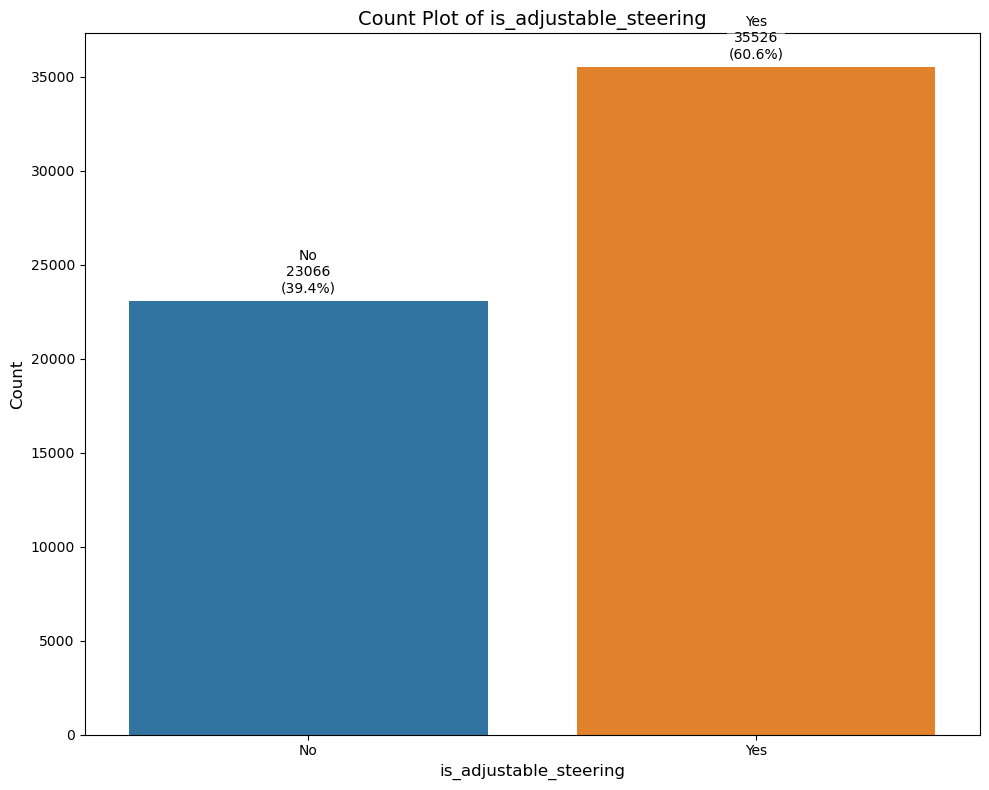

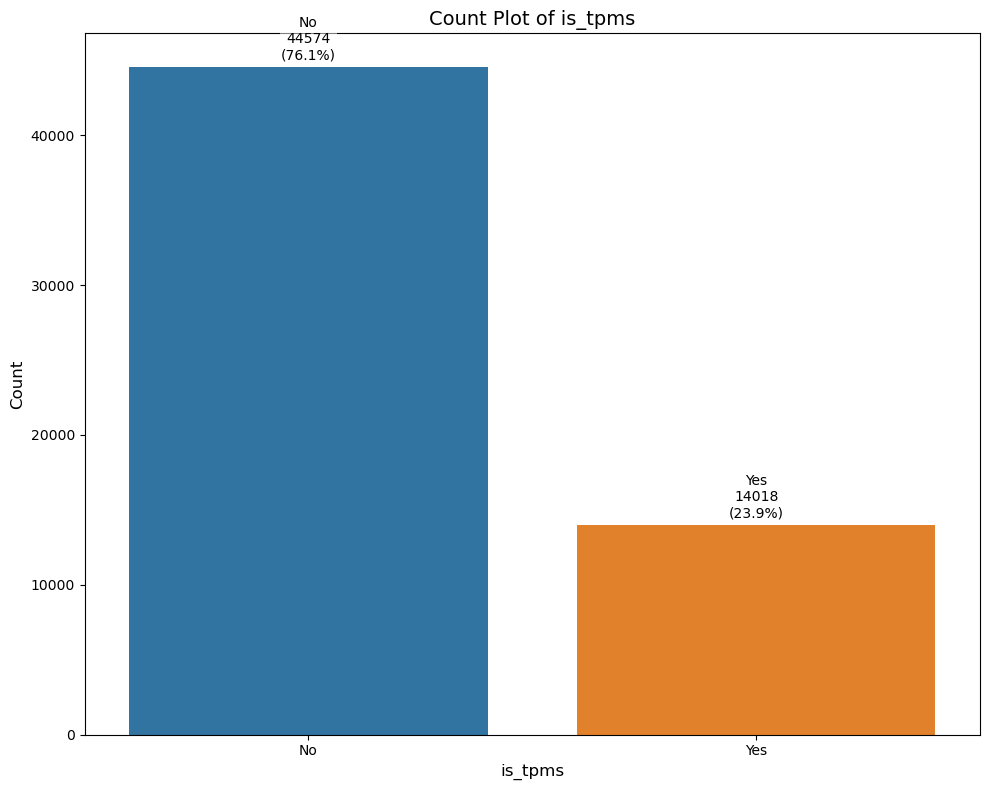

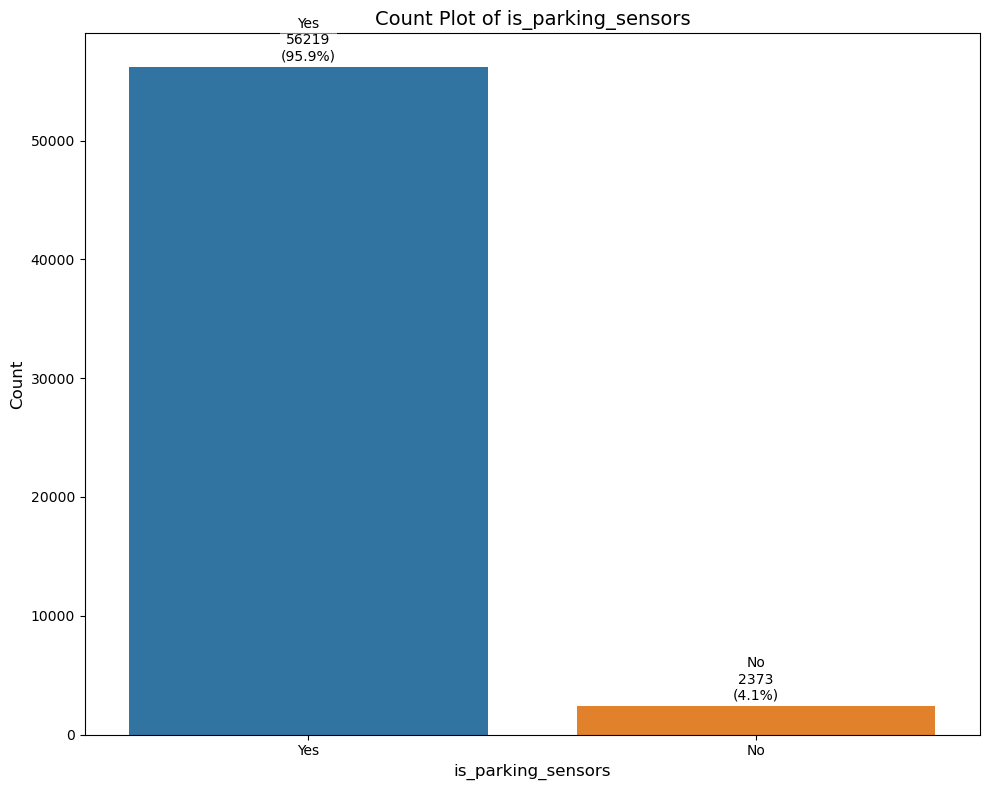

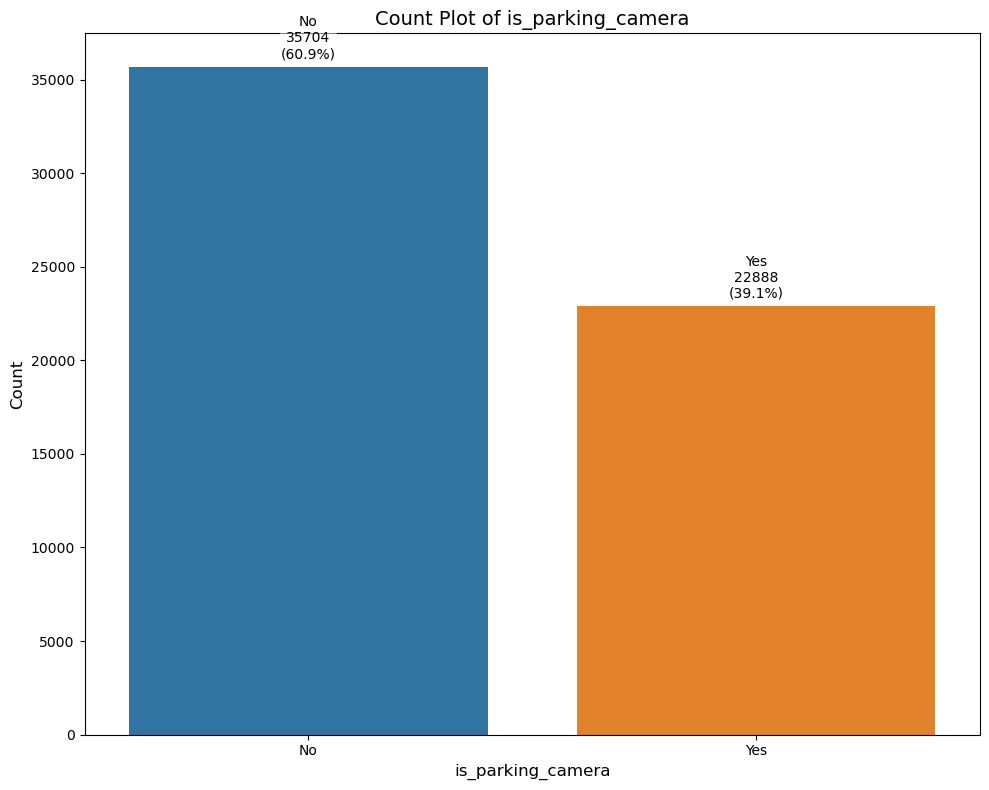

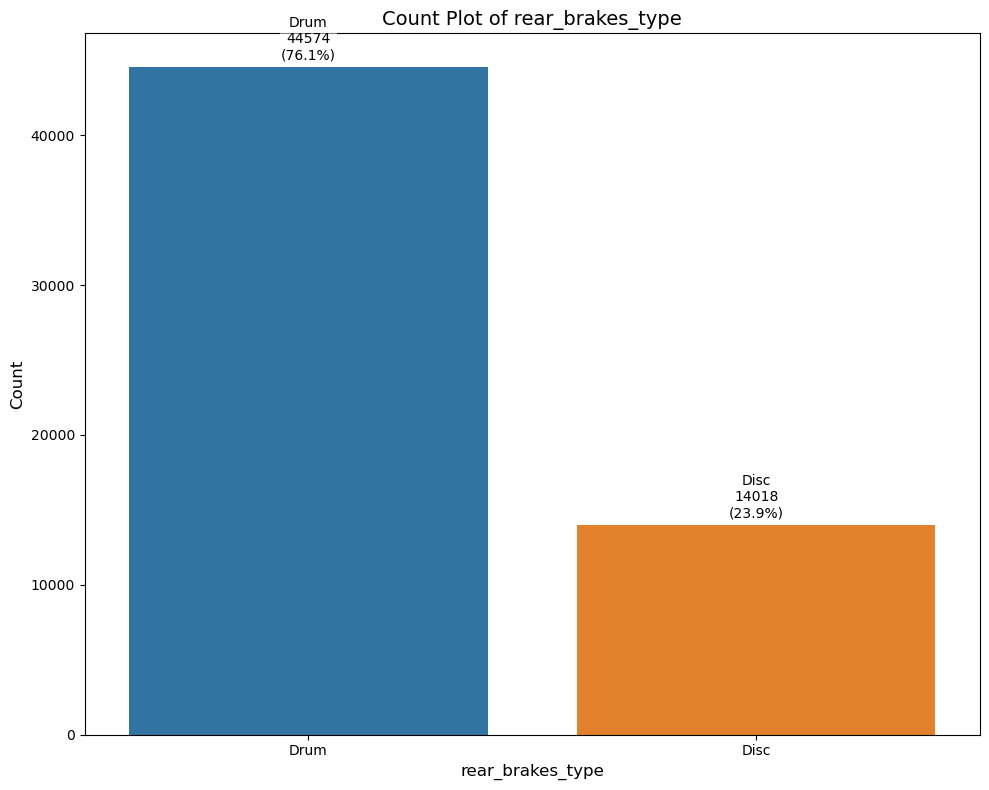

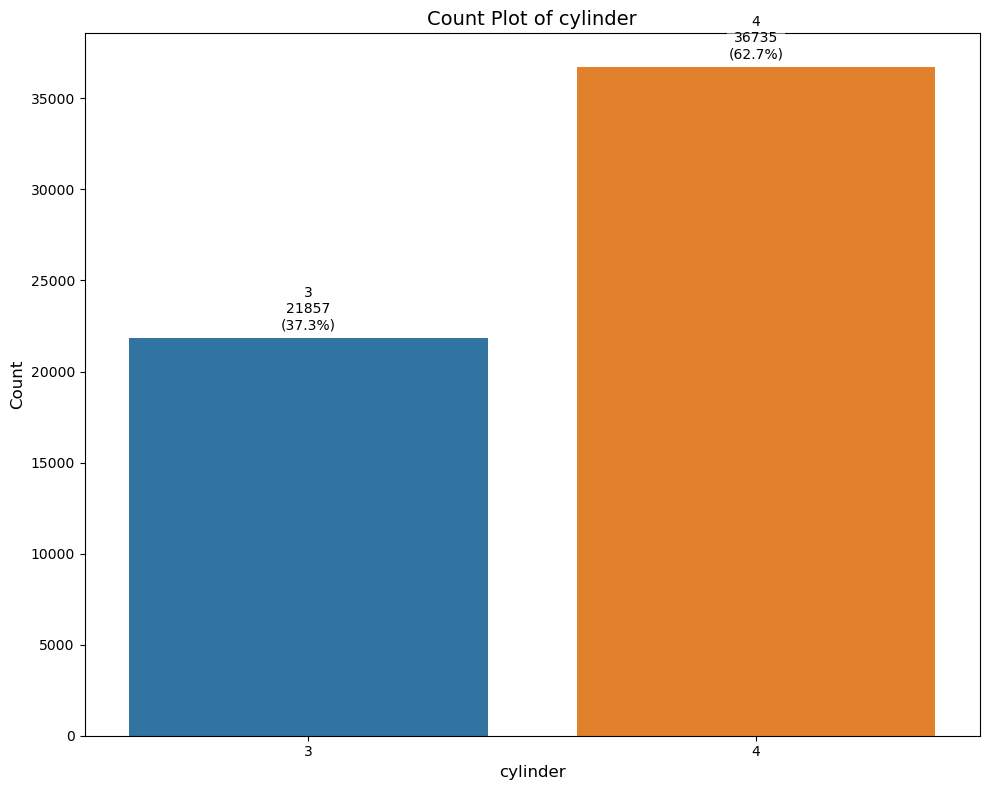

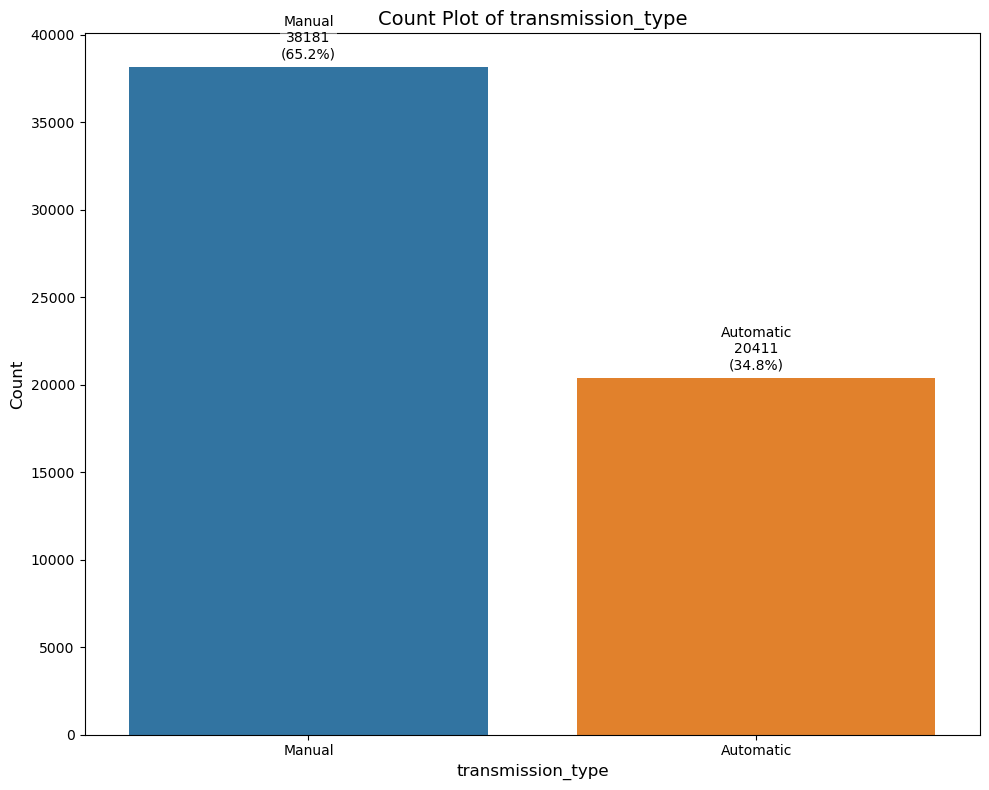

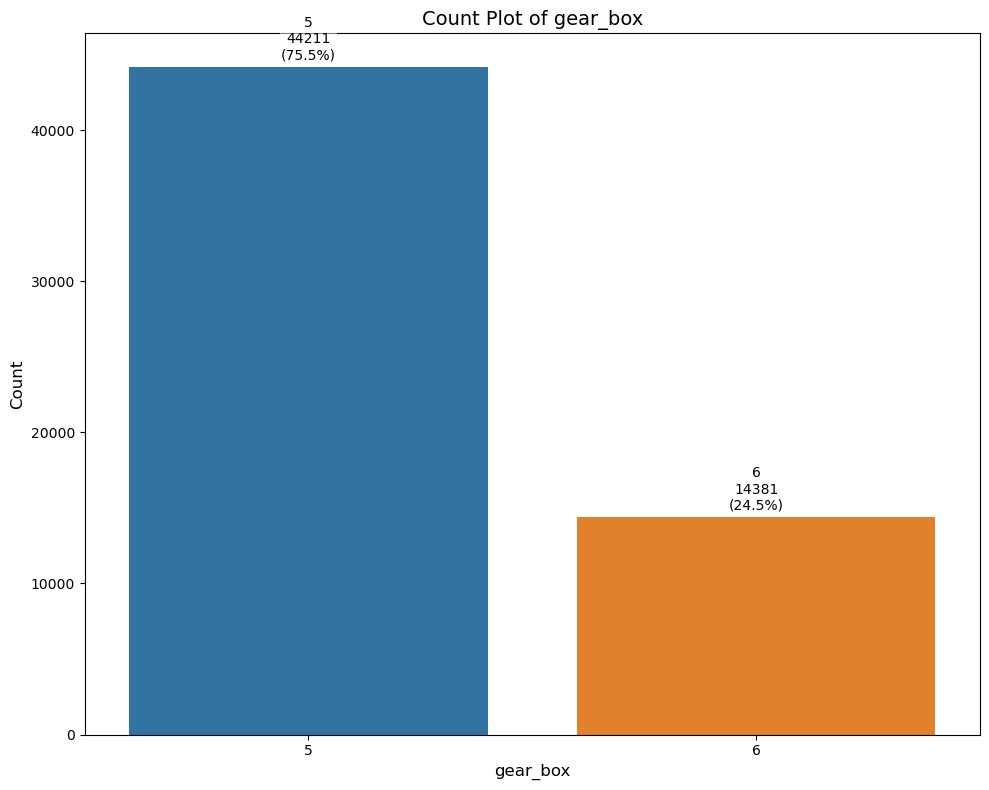

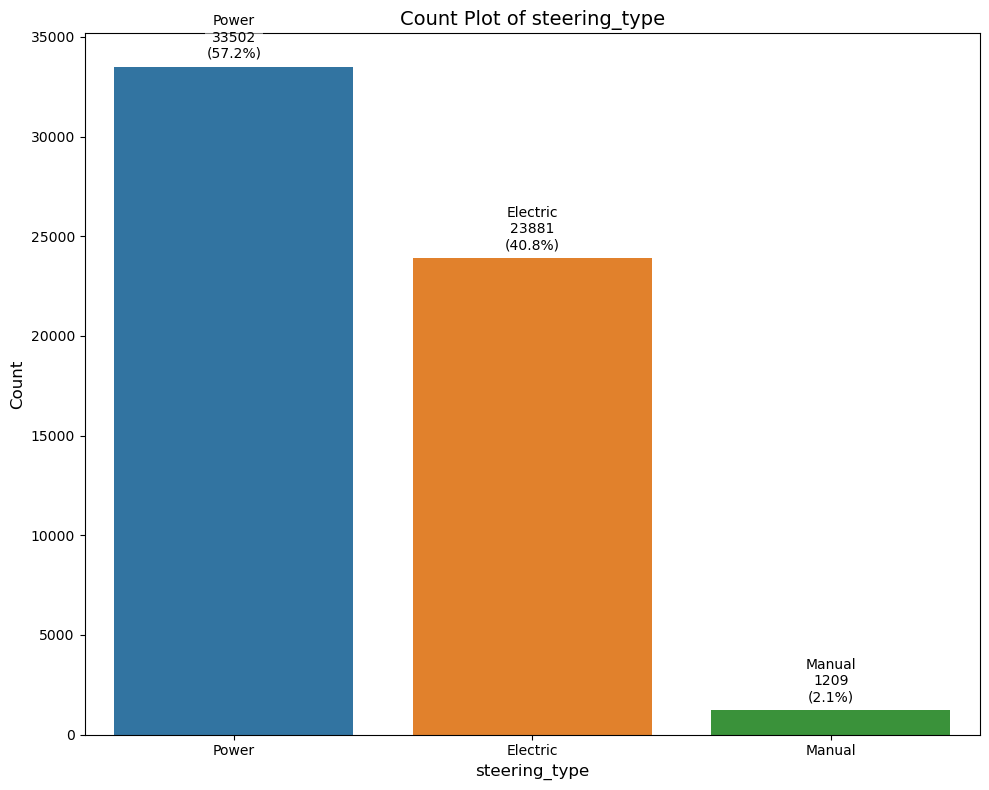

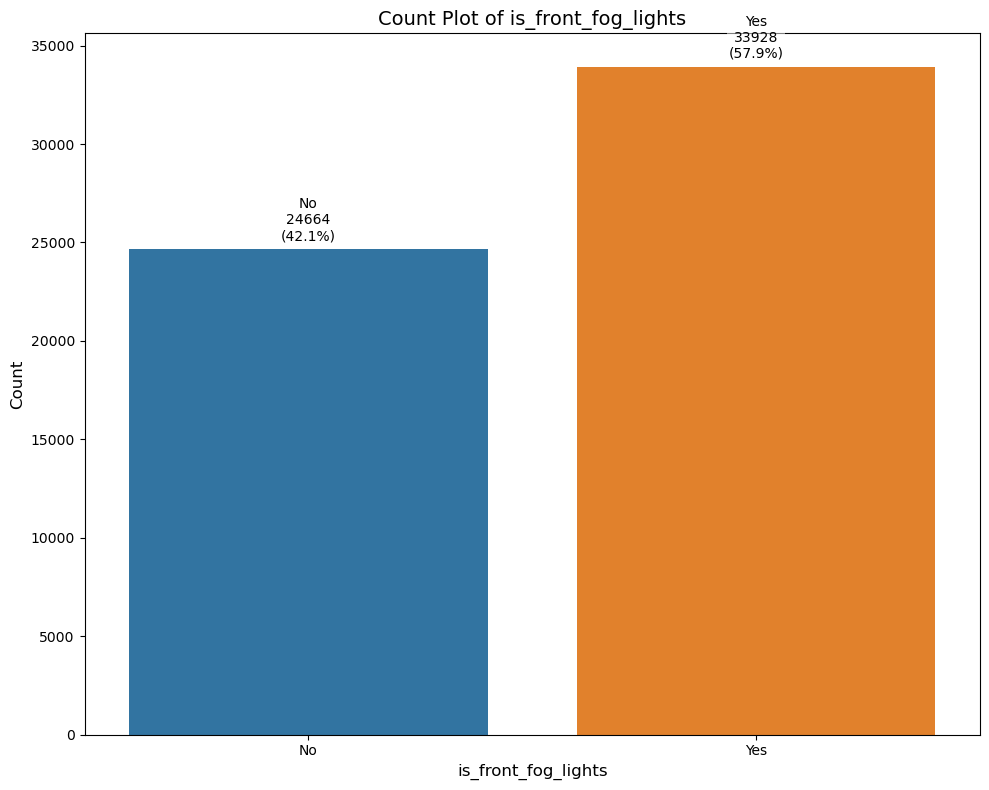

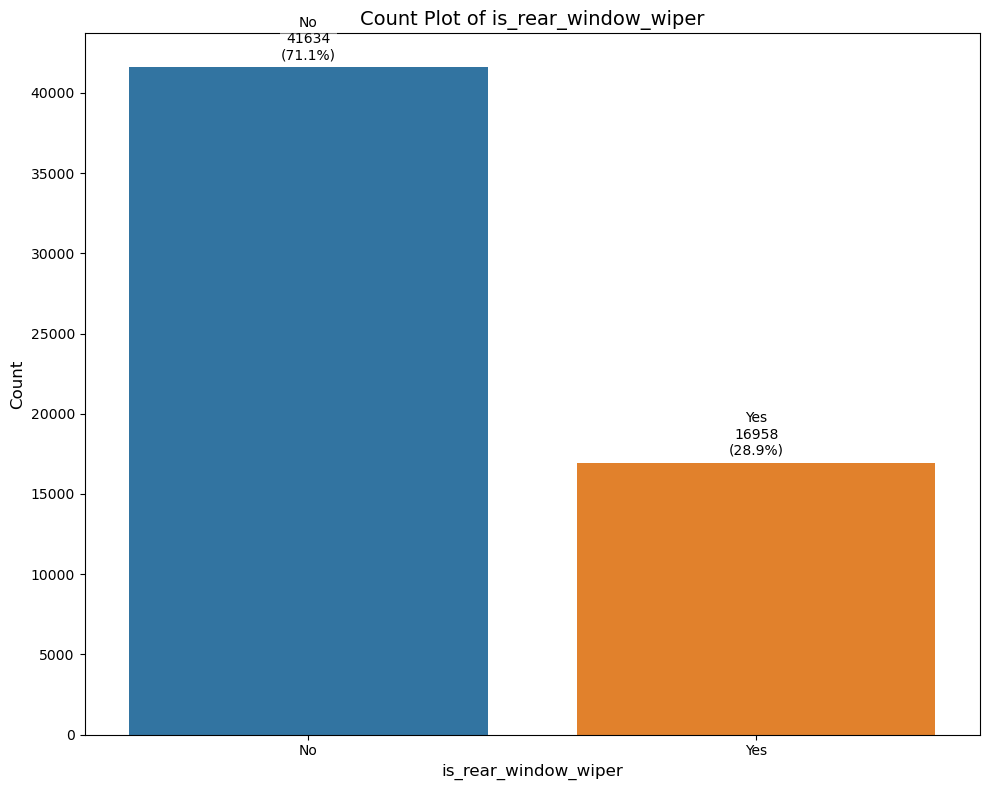

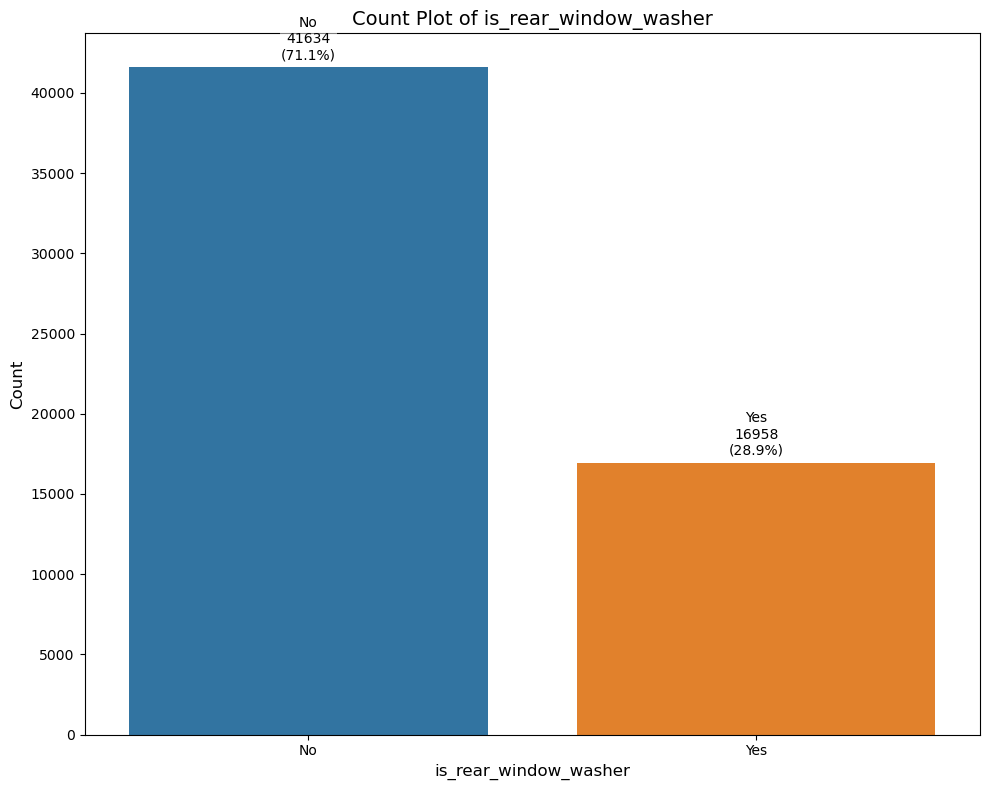

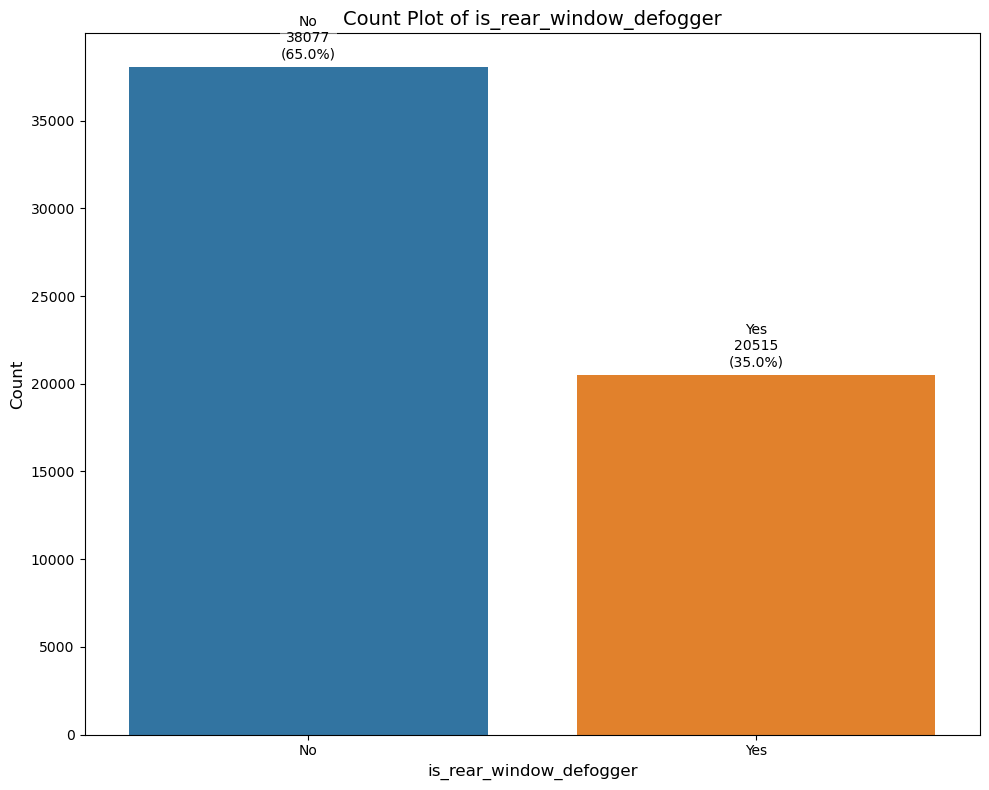

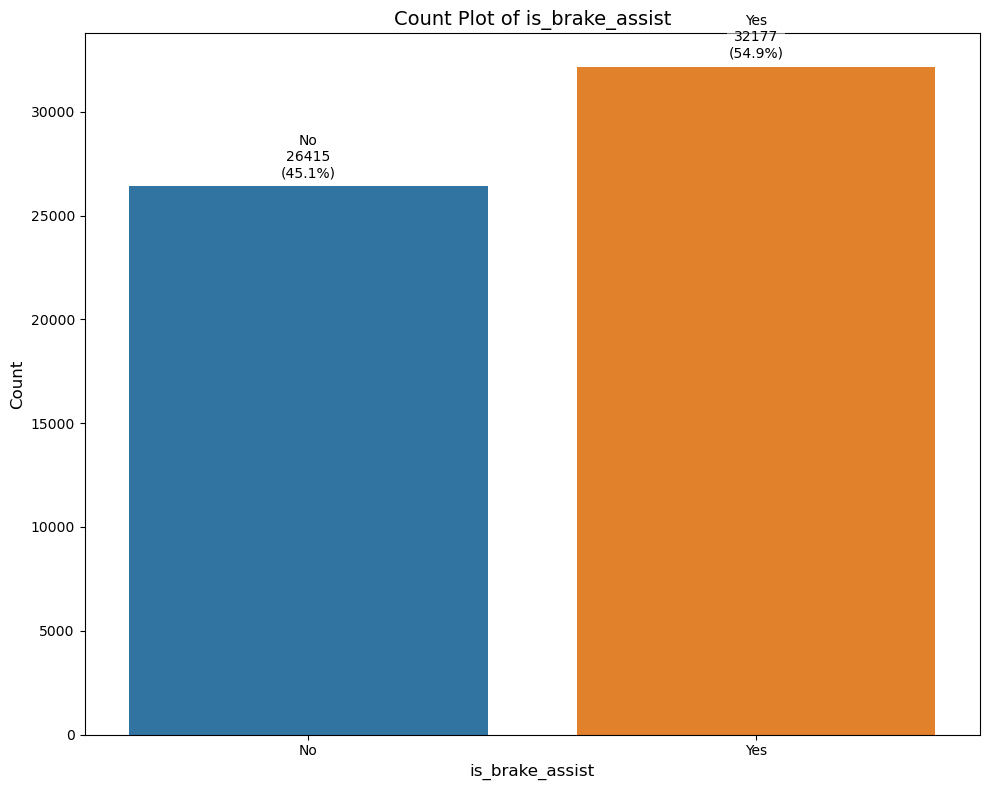

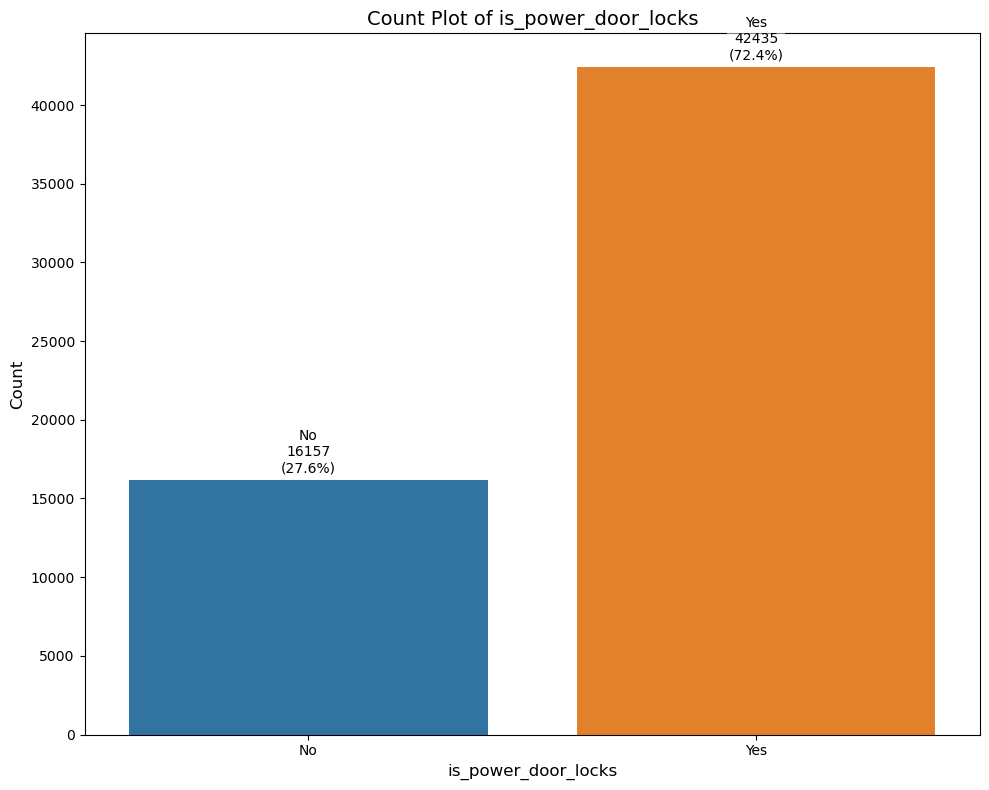

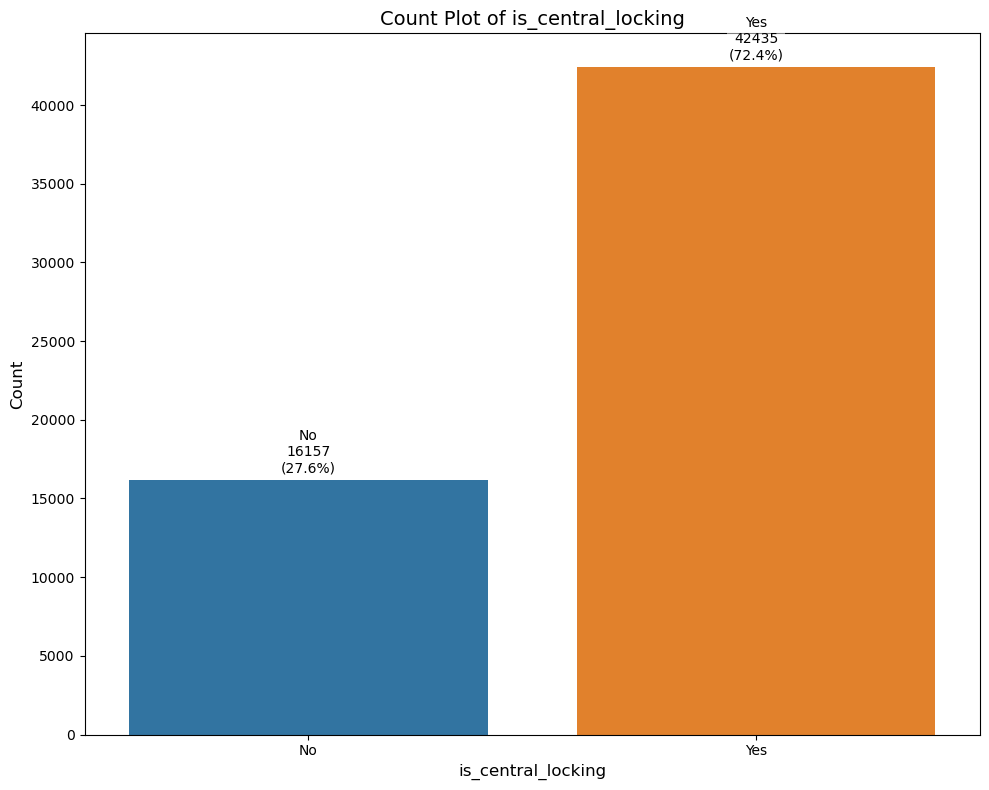

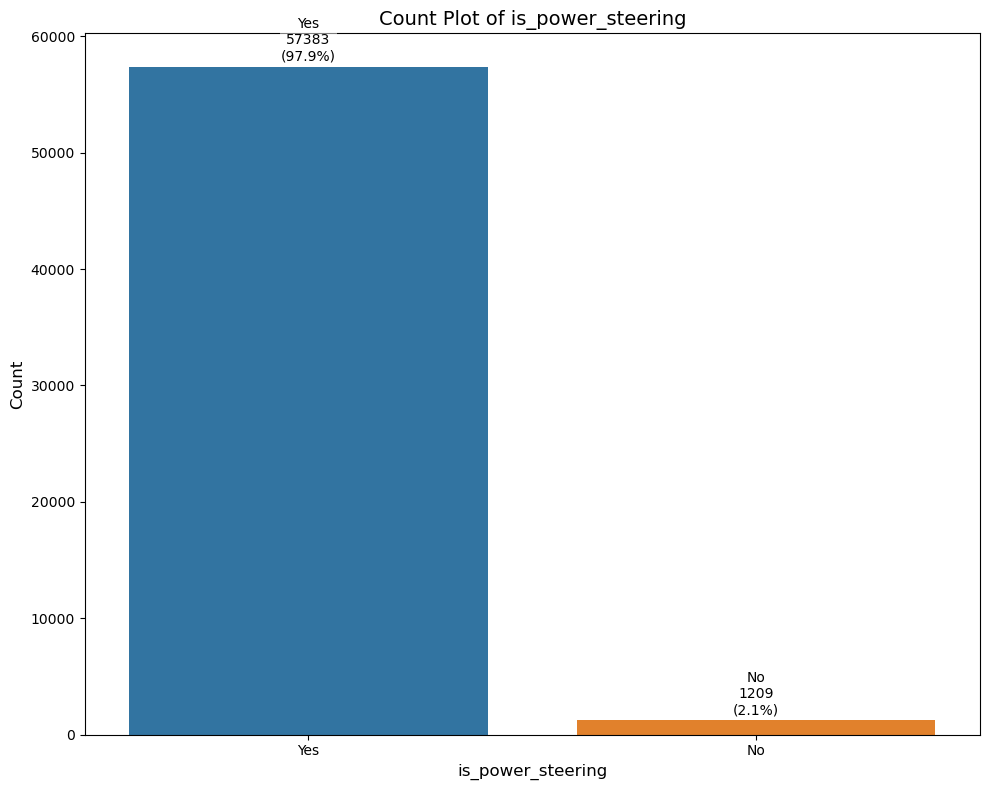

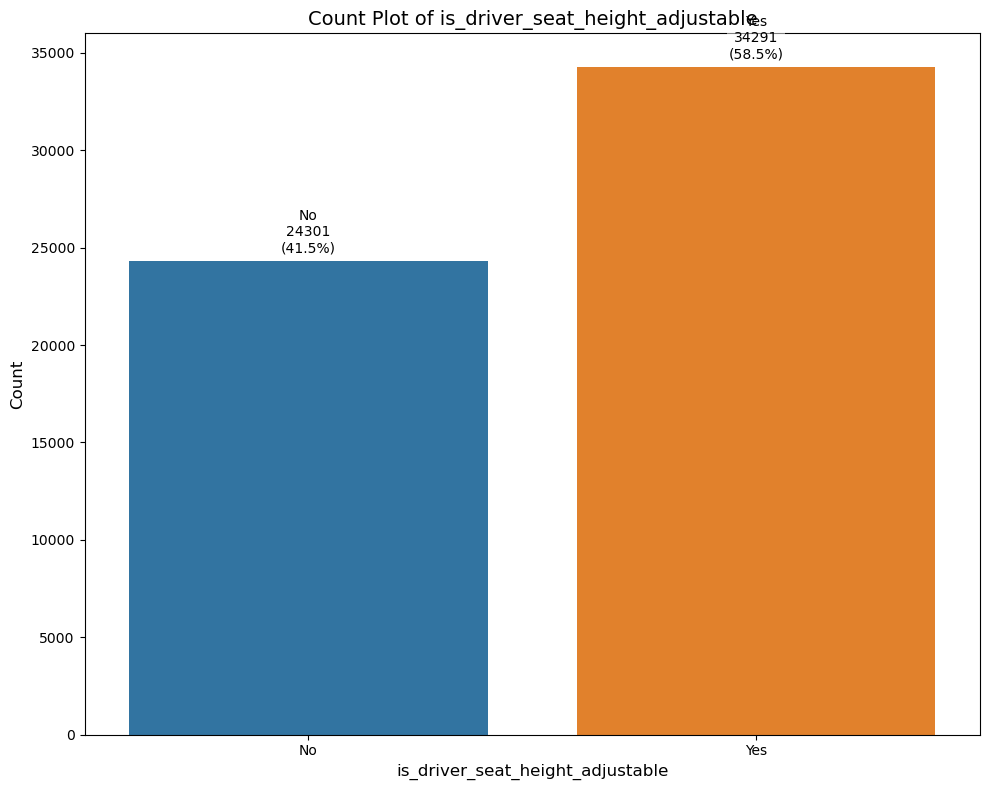

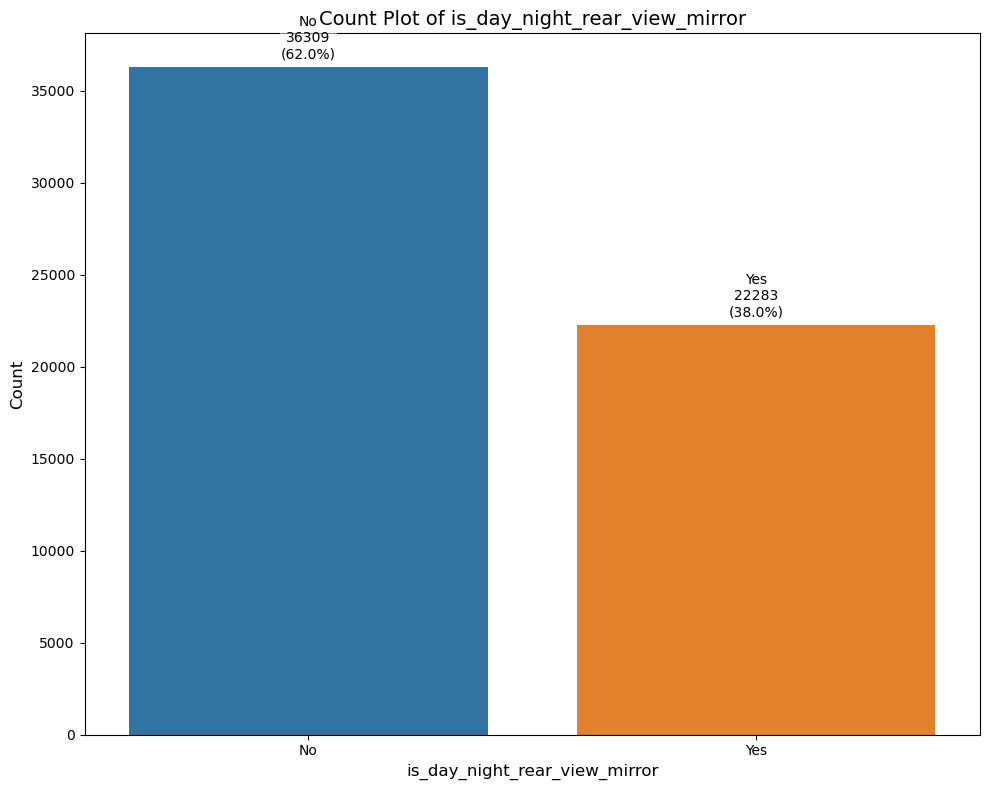

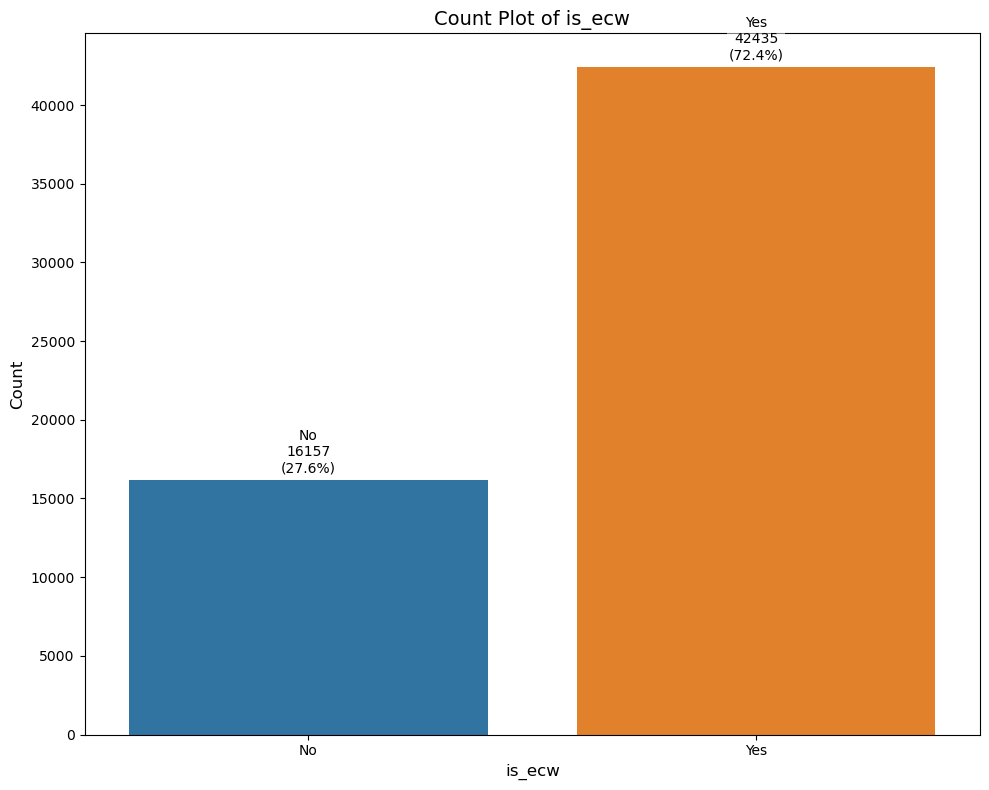

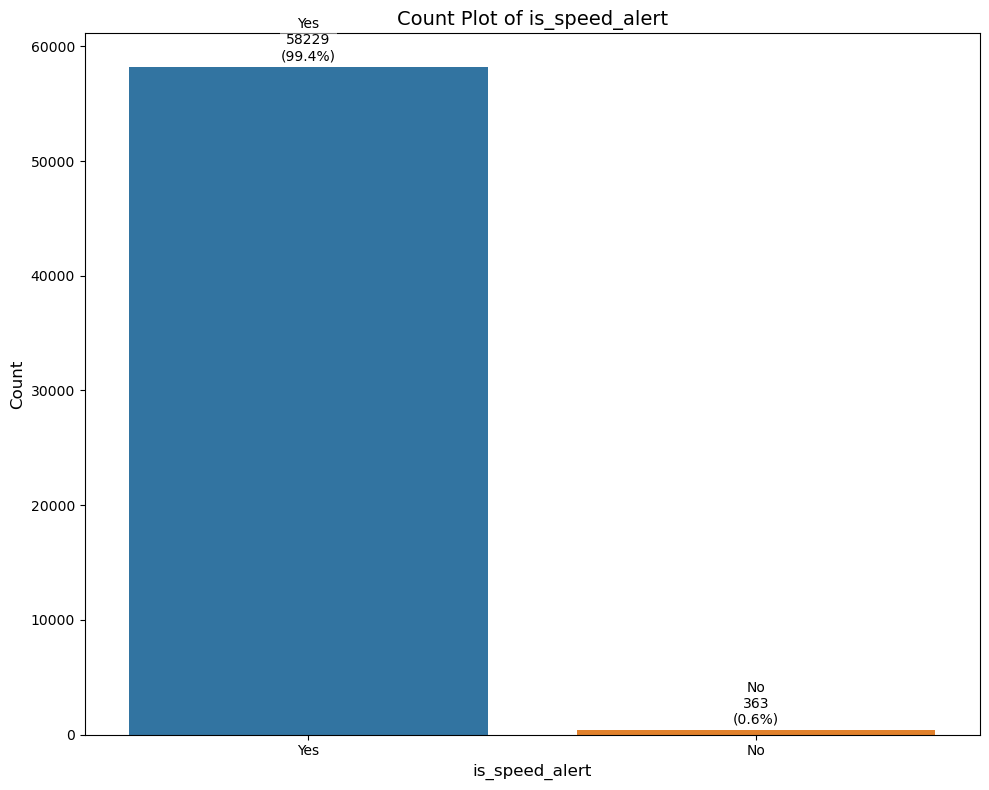

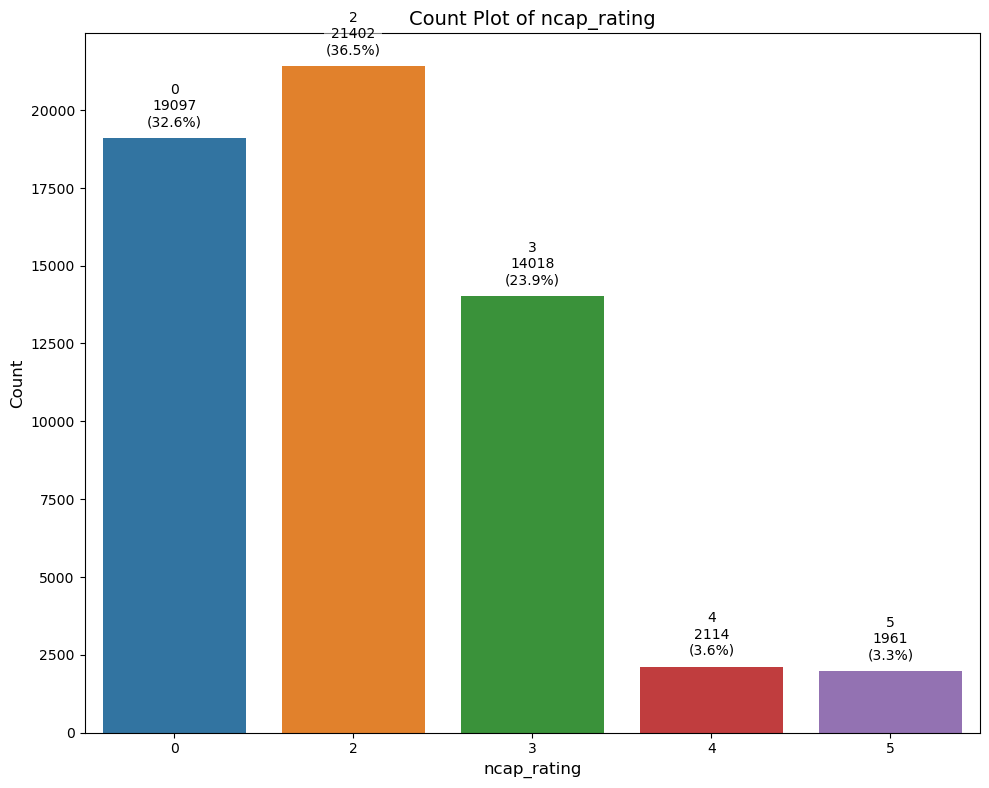

In [49]:
for feat in cate_features:
    plt.figure(figsize=(10, 8))
    
    # 1. Plot the countplot
    ax = sns.countplot(data=df, x=feat)
    
    plt.title(f'Count Plot of {feat}', fontsize=14)
    plt.xlabel(feat, fontsize=12)
    plt.ylabel('Count', fontsize=12)

    total = len(df)
    
    # 2. Get the actual order of categories displayed on the plot
    # The tick labels reliably reflect the order of the bars.
    # Note: On some matplotlib versions/backends, this might need refinement, 
    # but it's generally better than relying on value_counts().
    category_order = [t.get_text() for t in ax.get_xticklabels()]
    
    # Check if category_order is empty (e.g., if there are no tick labels set yet)
    if not category_order:
        print(f"Could not retrieve x-tick labels for {feat}. Skipping annotation.")
        plt.tight_layout()
        plt.show()
        continue

    # 3. Get the patches (the bars)
    patches = [p for p in ax.patches if isinstance(p, Rectangle)]
    
    # 4. Iterate and Annotate
    if len(patches) == len(category_order):
        for p, category in zip(patches, category_order):
            count = int(p.get_height())
            
            # Skip if bar height is 0
            if count == 0:
                continue 
                
            percentage = 100 * count / total
            
            # Annotation text (Category, Count, Percentage)
            annotation_text = f'{category}\n{count}\n({percentage:.1f}%)'
            
            # Add text annotation slightly above the bar
            ax.text(p.get_x() + p.get_width() / 2., 
                    p.get_height() + (total * 0.005), # A small offset
                    annotation_text,
                    ha='center', va='bottom', fontsize=10, color='black',
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1)) # Optional: Bbox for clarity
    else:
        print(f"Warning: Number of patches ({len(patches)}) does not match number of categories ({len(category_order)}) for {feat}.")

    plt.tight_layout()
    plt.show()

/var/folders/9t/c40z6541565d66vmpkmxh6kh0000gp/T/ipykernel_73121/1187267217.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


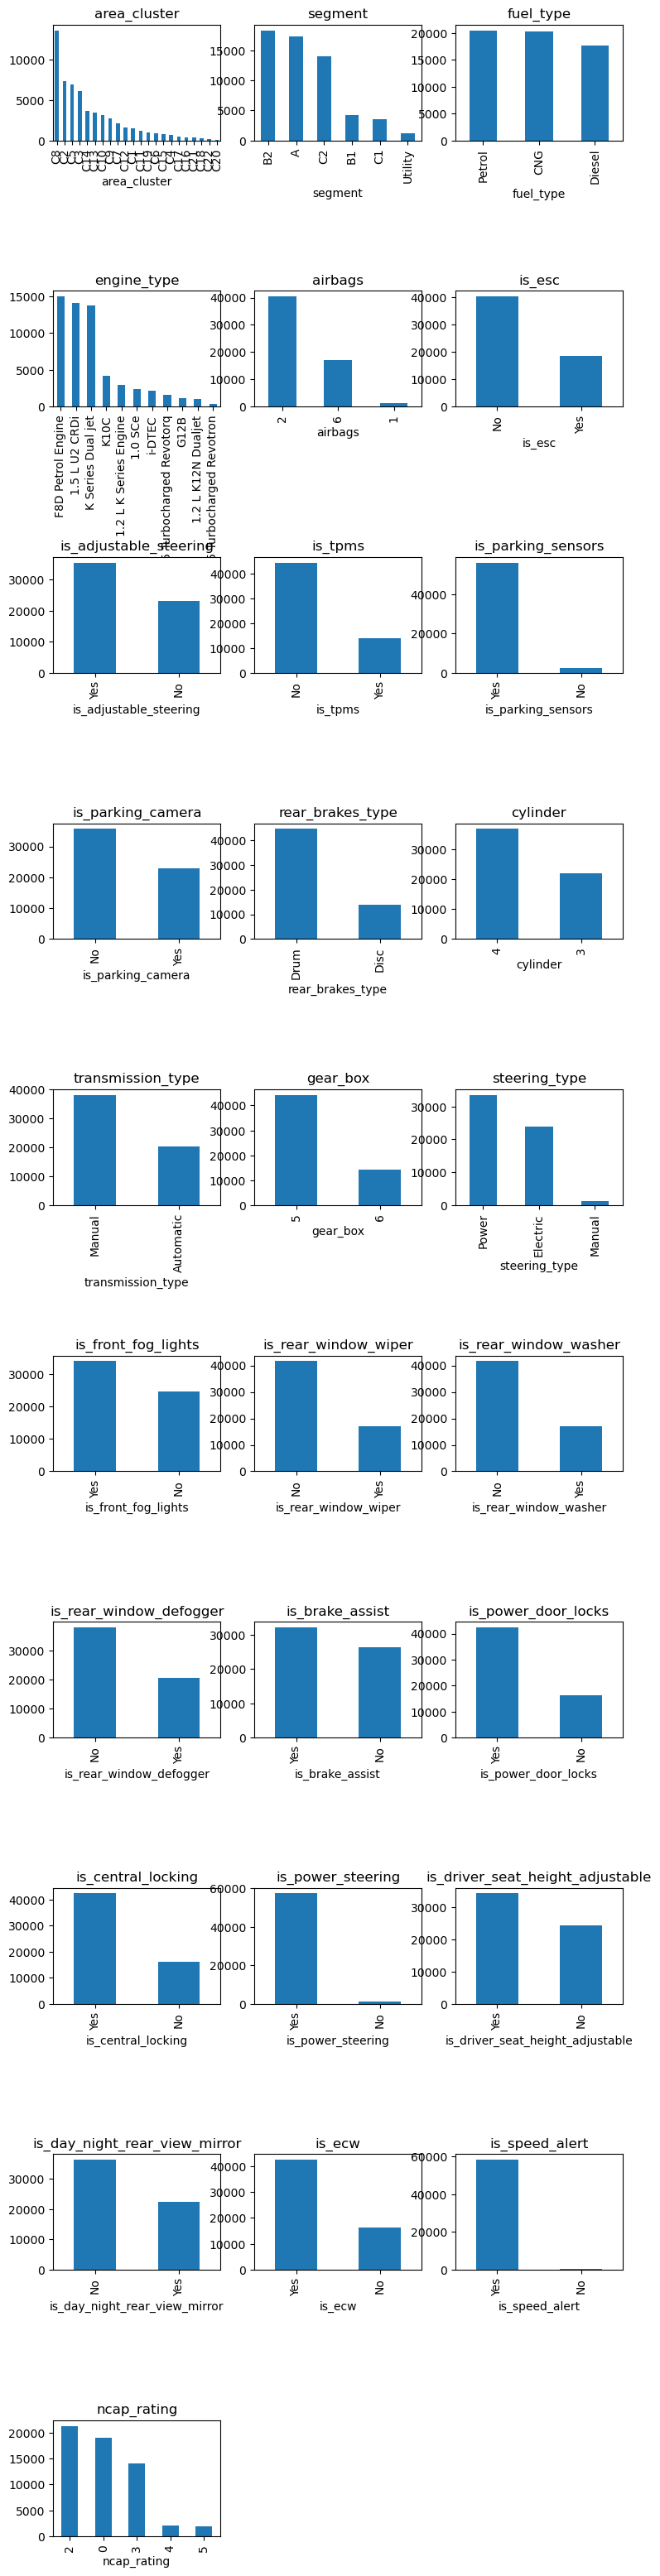

In [51]:
row = 14
col=3
iterator=1
for i in  cate_features:
    plt.subplots_adjust(left=None, bottom=1, right=1.2, top=10, wspace=None, hspace=1.3)
    plt.subplot(row,col,iterator)
    df[i].value_counts().plot(kind='bar')
    #sns.countplot(df.loc[:,i])
    plt.title(i)
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### __Key observations::__
__1. Safety and Components::__     
- Most cars (69%) only have 2 airbags (the minimum)(** need bivarient analysis **)
- Most use older Drum brakes in the back (76.1%).
- The engines are generally small, with most cars having 4 cylinders (62.7%)(**need bivarient analysis **)
- is_esc (Electronic Stability Control) is present in only 31.4% of the cars, indicating it's a feature of premium trims.
- is_brake_assist is nearly split (45.1% Yes vs. 54.9% No), making it a high-priority feature for bivariate analysis as it has good discriminatory power.(**)
- NCAP Ratings are centered heavily on 0, 2, and 3 stars, which combined account for 93.0% of the ratings.(** need bivarient analysis for high concentration **)
- is_tpms(tire pressure monitoring system) is absent in almost 76% cars. also it is not high priority predictor. may be ignored

__2.Geographic & Segment::__        
- Three areas (C9, C2, and C14) contain almost half (47.7%) of all the policies. This extreme concentration suggests area_cluster will be a primary predictor of claims.
- The market is overwhelmingly concentrated in three segments: B1 (31.3%), B2 (29.6%), and C2 (23.9%). These three mid-level segments make up over 84% of the data. (** Need bivarient analysis due to high concentrartion in only some categories **)

__3. Comfort & Utility Feature::__
- Universal Features :: Features that are standard across almost all cars - is_parking_sensor, is_power_steering, is_speed_slert. They provide minimal information about claim. (** do not need for bivarient analysis **)
- Common but not universal :: is_central_locking, is_ecw, and is_power_door_locks all have very similar distributions. with almost 70% yes and 30% no
- Features of a Significant Minority(not more than 40% yes) :: is_parking_camera, rear_window_defogger,is_day_night_rear_view_mirror
- rear_window_wiper and rear_window_washer :: absent in almost 72% cars
- is_break_assist, is_driver_seat_adjustable :: almost 50-50 spliting. to understand deeply need bivarient analysis

In [241]:
df['is_power_door_locks'].value_counts()

is_power_door_locks
Yes    42435
No     16157
Name: count, dtype: int64

In [137]:
df['is_ecw'].value_counts()

is_ecw
Yes    42435
No     16157
Name: count, dtype: int64

In [40]:
df['is_central_locking'].value_counts()

is_central_locking
Yes    42435
No     16157
Name: count, dtype: int64

In [41]:
df['is_adjustable_steering'].value_counts()

is_adjustable_steering
Yes    35526
No     23066
Name: count, dtype: int64

### __Bivarient Analysis for Categorical feature__

In [53]:
bivariant_cate_features = ['area_cluster', 'segment', 'fuel_type', 'engine_type', 'airbags',
       'is_esc','is_parking_camera', 'rear_brakes_type', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking','is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'ncap_rating']

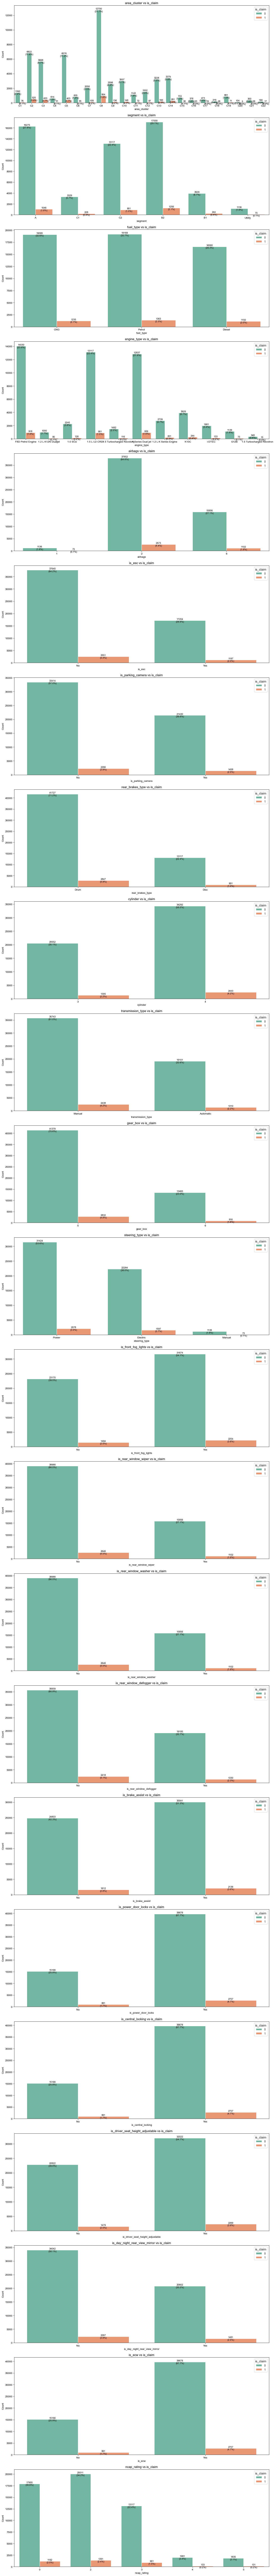

In [55]:
# Setting up 23 rows
fig, axes = plt.subplots(23, 1, figsize=(15, 6 * 23)) # Adjusted figsize height for better vertical spacing
sns.set(style="whitegrid")

axes = axes.flatten()

for i, feature in enumerate(bivariant_cate_features):
    ax = axes[i]
    sns.countplot(data=df, x=feature, hue=df['is_claim'].astype(str), palette='Set2', ax=ax)
    ax.set_title(f'{feature} vs is_claim')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    
    total = len(df)
    # Adding counts and percentages on each bar
    for p in ax.patches:
        if isinstance(p, Rectangle):
            count = int(p.get_height())
            if count == 0:
                continue
            percentage = 100 * count / total
            ax.text(p.get_x() + p.get_width() / 2.,
                    p.get_height() + 3,
                    f'{count}\n({percentage:.1f}%)',
                    ha='center', va='center', fontsize=9, color='black')
    
    ax.legend(title='is_claim')

# Hide any unused subplots (if fewer than 4 features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
max_torque,58592.0,134.450937,73.146794,60.000000,60.000000,113.000000,200.000000,250.000000
max_power,58592.0,78.976765,27.699259,40.360000,40.360000,88.500000,97.890000,118.360000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000
length,58592.0,3850.476891,311.457119,3445.000000,3445.000000,3845.000000,3995.000000,4300.000000
width,58592.0,1672.233667,112.089135,1475.000000,1515.000000,1735.000000,1755.000000,1811.000000


### __Univarient Analysis for Numerical feature__

In [63]:
numeric_featuress=df.select_dtypes(include=np.number).columns
numeric_featuress

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'max_torque', 'max_power', 'displacement',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_claim'],
      dtype='object')

/var/folders/9t/c40z6541565d66vmpkmxh6kh0000gp/T/ipykernel_73121/3342517220.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=axes[i], kde=False, bins=30,color=color)


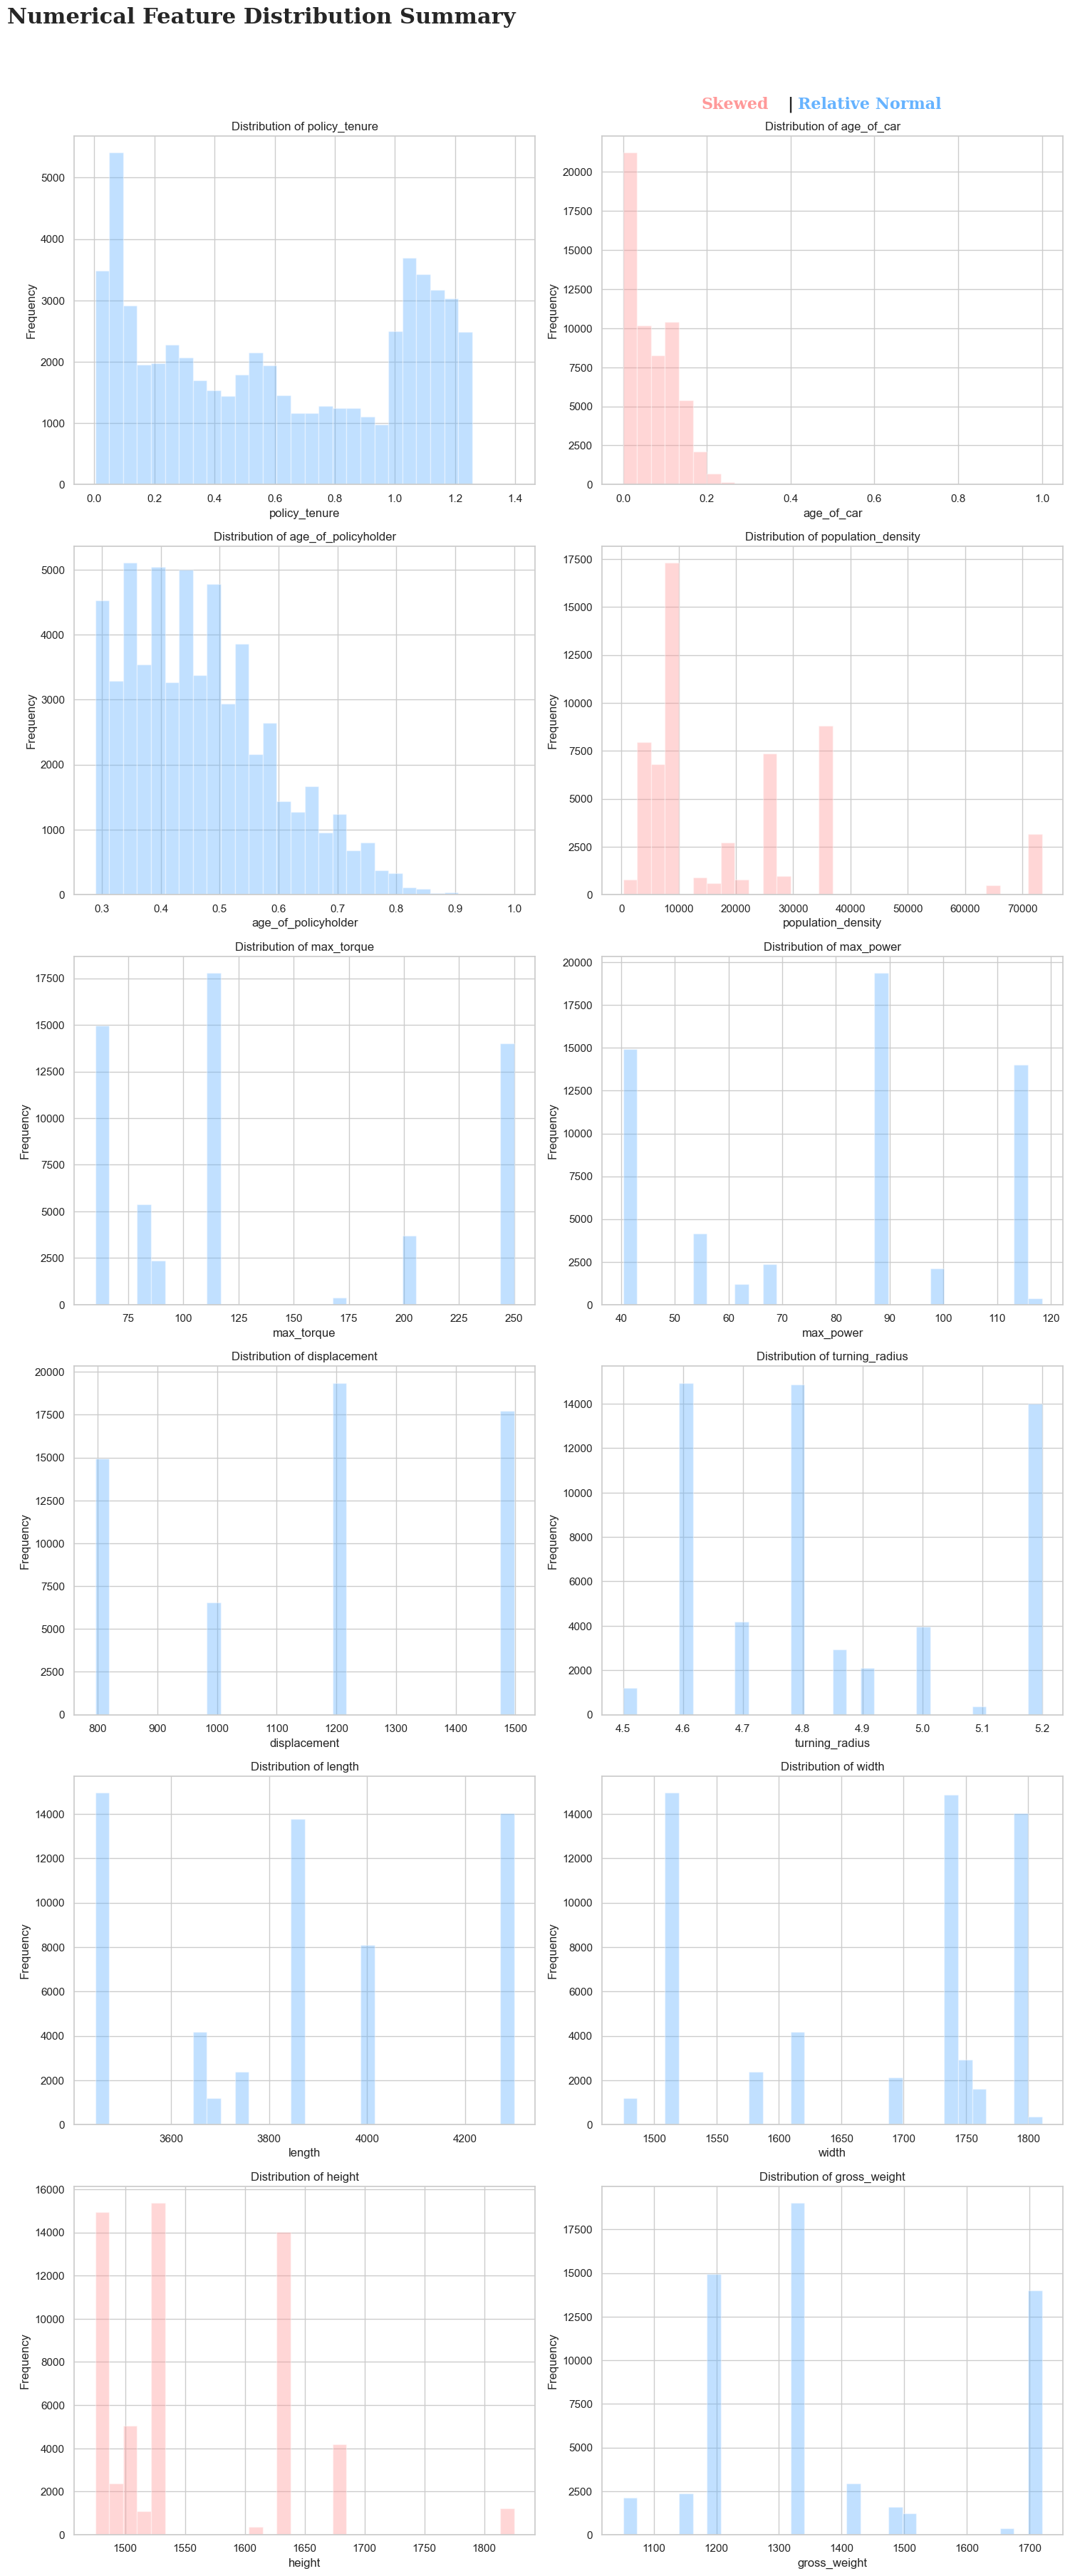

In [65]:
numeric_features = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'max_torque', 'max_power', 'displacement',
       'turning_radius', 'length', 'width', 'height', 'gross_weight']

fig, axes = plt.subplots(7, 2, figsize=(15, 40))  
fig.text(0, 1.03,'Numerical Feature Distribution Summary', {'font':'serif','size':22, 'weight':'bold'}, alpha = 1)

fig.text(0.65,1, "Skewed",{'font':'serif','size':16, 'weight':'bold', 'color':'#ff9999'})
fig.text(0.73,1, '|',{'font':'serif','size':16, 'weight':'bold'})
fig.text(0.74,1, "Relative Normal",{'font':'serif','size':16, 'weight':'bold','color':'#66b3ff'})

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    skewness = skew(df[feature].dropna())

    if abs(skewness) > 1:
        color = '#ff9999'
    else:
        color = '#66b3ff'
        
    sns.distplot(df[feature], ax=axes[i], kde=False, bins=30,color=color)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### __Key Observations::__
1. age_age_car and age_of_policyholderare strongly skewed towards younger policies and newer cars
2. population_density is highly multimodal and non-uniform. The distribution shows several extremely high-density pockets (right tail).
3. height, weight, and engine details are clustered into groups

### __Log transformation for skewed features:__

In [67]:
df.age_of_car.skew()

1.0940812262542075

In [69]:
df.age_of_policyholder.skew()

0.6400493147434646

In [71]:
## Log transformation for age_of_car and age_of_policyholders to treat skewness

df['age_of_car_transformed'] = np.log1p(df['age_of_car'])
df['age_of_policyholders_transformed'] = np.log1p(df['age_of_policyholder'])

In [73]:
df.age_of_policyholders_transformed.skew()

0.4721408605145089

In [75]:
df.age_of_car_transformed.skew()

0.7928451853918118

### __Countplot for numerical features__

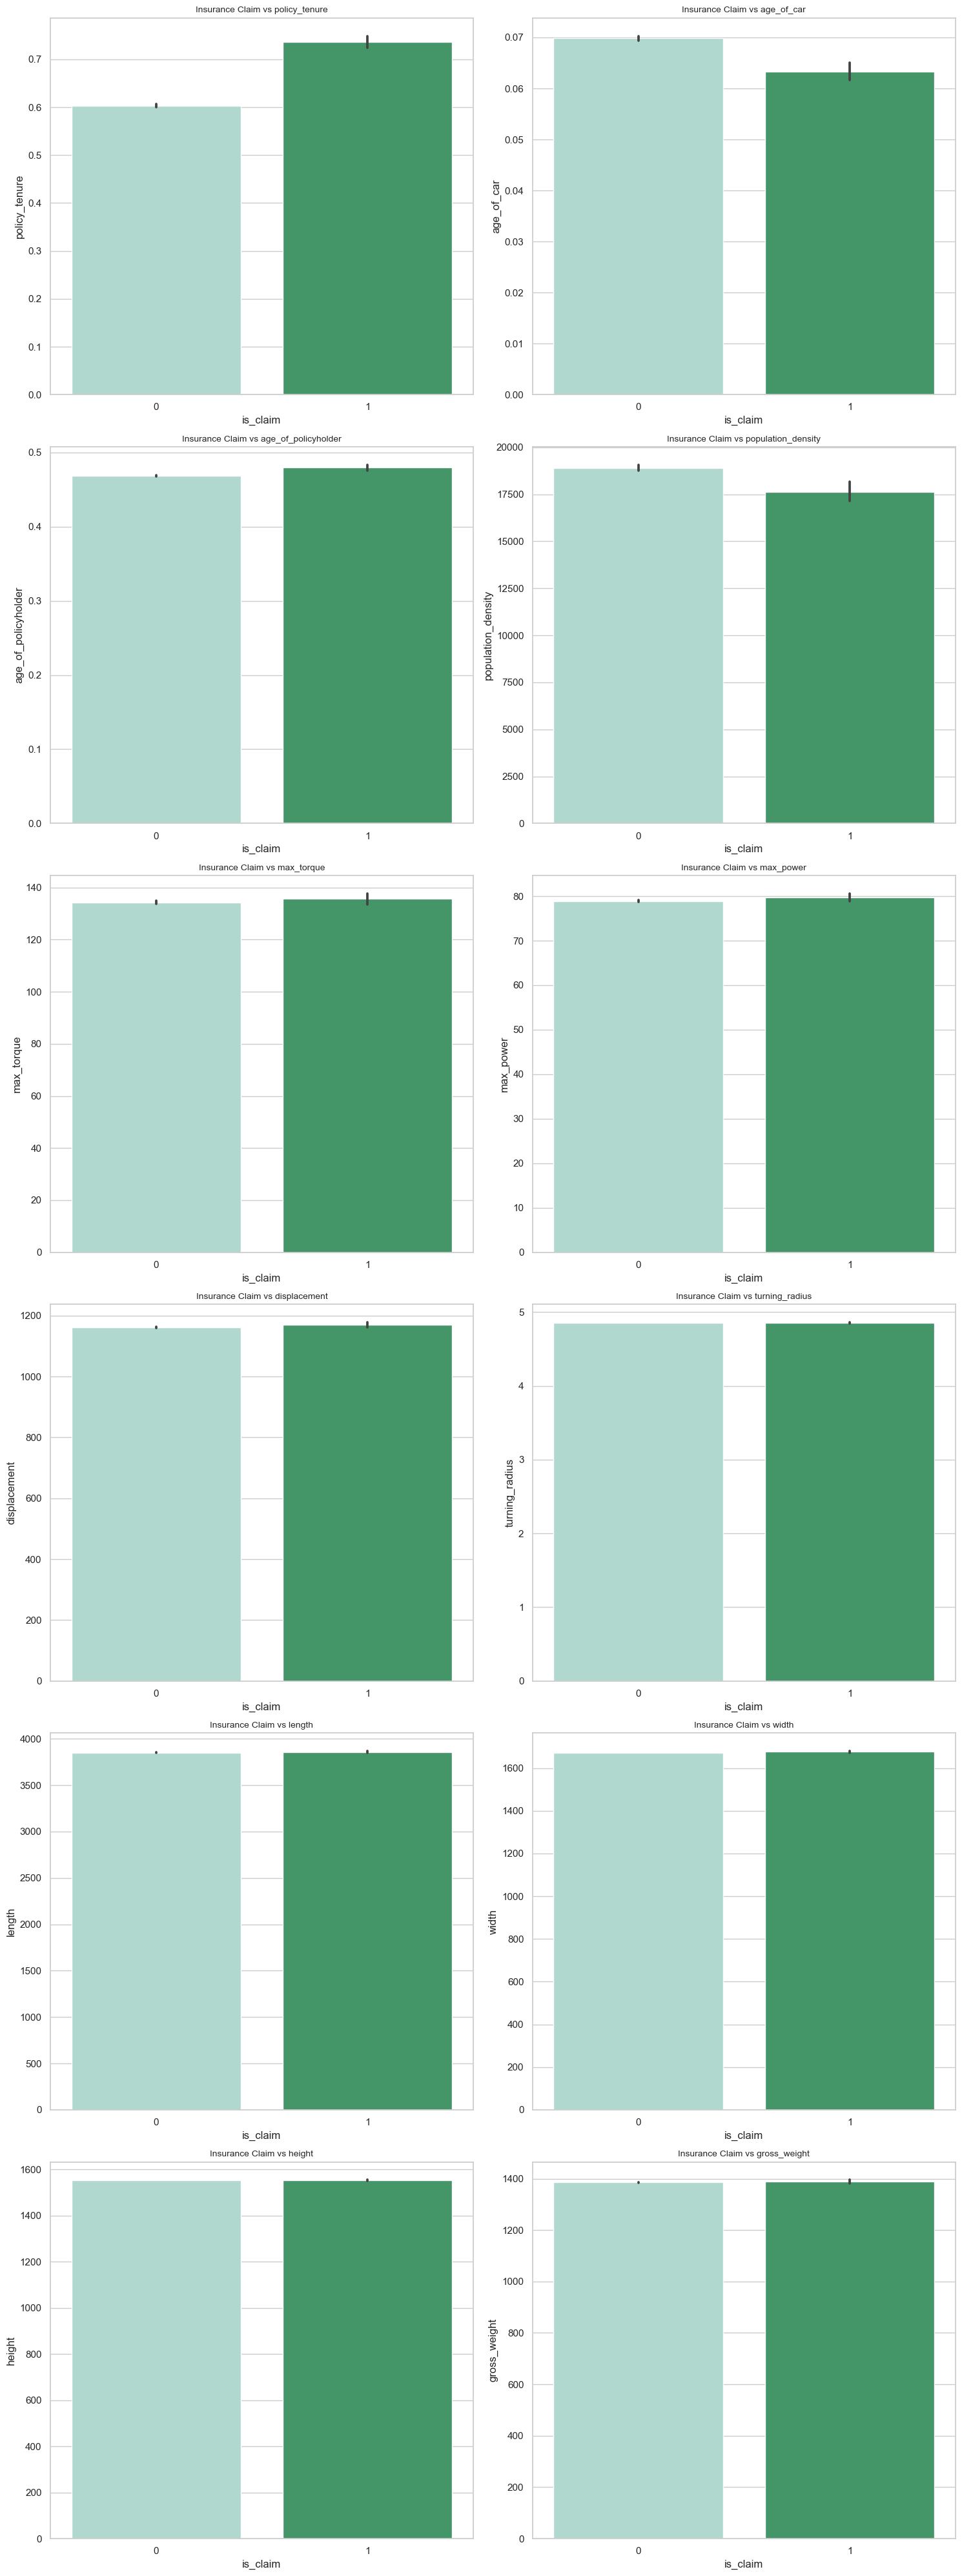

In [77]:
fig, axes = plt.subplots(6, 2, figsize=(15, 40)) 
sns.set(rc={'figure.figsize':(8,6),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
         style="darkgrid")

# Flatten the axes array in case it's 2D (like (9,2)) so we can loop through it easily
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.barplot(data=df, x="is_claim", y=col, palette='BuGn', ax=axes[i])
    axes[i].set_title(f'Insurance Claim vs {col}')

# Hide any unused subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### __Outlier in numerical features__

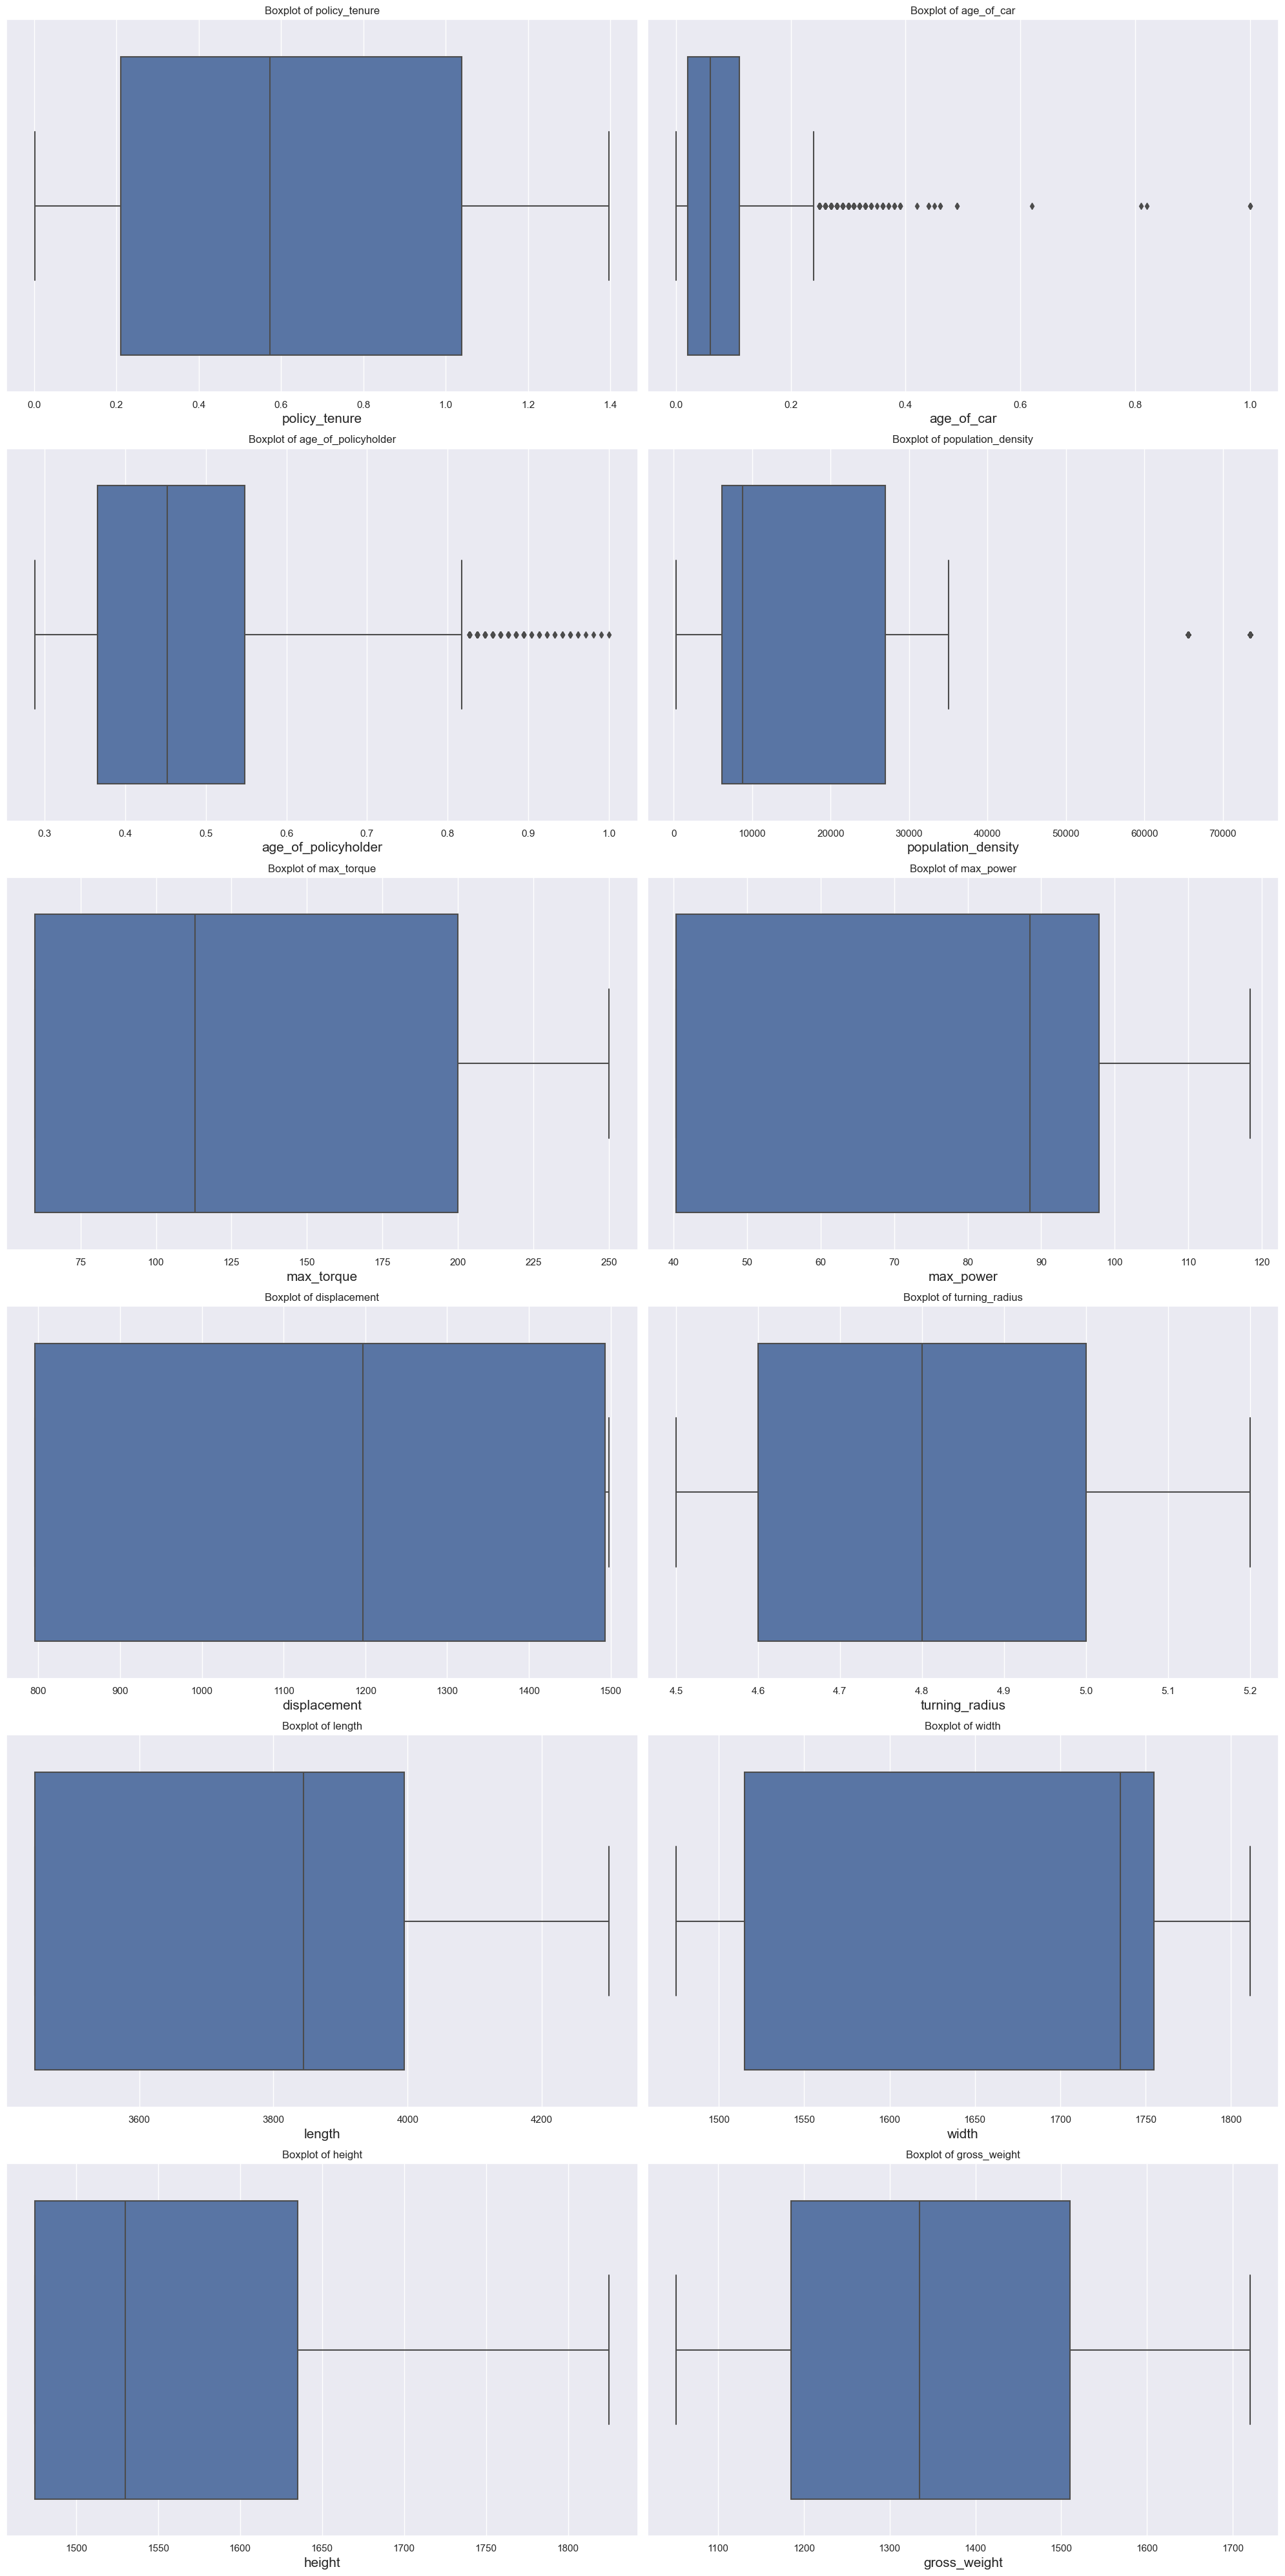

In [79]:
fig, axes = plt.subplots(6, 2, figsize=(20, 40))  # 9 rows, 2 cols

for ax, col in zip(axes.flatten(), numeric_features):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}', fontsize=12)

plt.tight_layout()
plt.show()

- there are some outliers in age_of_car, age_of_policy holders

In [81]:
df.shape

(58592, 43)

In [83]:
## including only numerical columns in new dataframe numerical_features_df
numerical_features_df = df[numeric_features]

## Calculate the IQR for each feature
Q1 = numerical_features_df.quantile(0.25)
Q3 = numerical_features_df.quantile(0.75)

IQR = Q3 - Q1
outlier_threshold = 1.5

outliers = ((numerical_features_df < (Q1 - outlier_threshold * IQR)) | (numerical_features_df > (Q3 + outlier_threshold * IQR)))

# Count the number of outliers in each numerical column
outliers_count = outliers.sum()

print('Outliers count')
print(outliers_count)

Outliers count
policy_tenure             0
age_of_car              269
age_of_policyholder     221
population_density     3647
max_torque                0
max_power                 0
displacement              0
turning_radius            0
length                    0
width                     0
height                    0
gross_weight              0
dtype: int64


In [85]:
# Calculate lower and upper bounds for clipping
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR

# Clipping the numerical features to the IQR bounds
numerical_features_df_clipped = numerical_features_df.clip(lower=lower_bound, upper=upper_bound, axis=1)

df_treated = df.copy()
df_treated[numeric_features] = numerical_features_df_clipped

# Print to confirm clipping
print("Outlier clipping applied using IQR method.")
print('Original Dataframe size :: ', df.shape)
print('cleaned Dataframe size :: ', df_treated.shape)

Outlier clipping applied using IQR method.
Original Dataframe size ::  (58592, 43)
cleaned Dataframe size ::  (58592, 43)


In [87]:
df_treated.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,segment,fuel_type,max_torque,max_power,engine_type,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,age_of_car_transformed,age_of_policyholders_transformed
0,0.515874,0.05,0.644231,C1,4990.0,A,CNG,60.0,40.36,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.048790,0.497273
1,0.672619,0.02,0.375000,C2,27003.0,A,CNG,60.0,40.36,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.019803,0.318454
2,0.841110,0.02,0.384615,C3,4076.0,A,CNG,60.0,40.36,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.019803,0.325422
3,0.900277,0.11,0.432692,C4,21622.0,C1,Petrol,113.0,88.50,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.104360,0.359555
4,0.596403,0.11,0.634615,C5,34738.0,A,Petrol,91.0,67.06,1.0 SCe,...,Yes,Yes,No,Yes,Yes,Yes,2,0,0.104360,0.491408


### __Encoding__

- I have a mix of categorical features:: Binary features(yes/no) and nominal features(more than 2 categories)
- i will apply one hot encoding for all categorical features
- also Frequency encoding for area_cluster and engine type as they have many categories.

In [89]:
## Identifying the type of categorical features
cate = df_treated.select_dtypes(include = object).columns
cate

Index(['area_cluster', 'segment', 'fuel_type', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

In [275]:
df_treated['area_cluster'].value_counts()

area_cluster
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: count, dtype: int64

In [71]:
df_treated['fuel_type'].value_counts()

fuel_type
Petrol    20532
CNG       20330
Diesel    17730
Name: count, dtype: int64

In [171]:
df_treated['engine_type'].value_counts()

engine_type
F8D Petrol Engine            14948
1.5 L U2 CRDi                14018
K Series Dual jet            13776
K10C                          4173
1.2 L K Series Engine         2940
1.0 SCe                       2373
i-DTEC                        2114
1.5 Turbocharged Revotorq     1598
G12B                          1209
1.2 L K12N Dualjet            1080
1.5 Turbocharged Revotron      363
Name: count, dtype: int64

#### Frequency Encoding

In [91]:
frequency_map = df_treated['area_cluster'].value_counts(normalize=True).to_dict()
df_treated['area_cluster'] = df_treated['area_cluster'].map(frequency_map)

In [93]:
frequency_map = df_treated['engine_type'].value_counts(normalize=True).to_dict()
df_treated['engine_type'] = df_treated['engine_type'].map(frequency_map)

In [95]:
df_treated.head(2)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,segment,fuel_type,max_torque,max_power,engine_type,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,age_of_car_transformed,age_of_policyholders_transformed
0,0.515874,0.05,0.644231,0.025055,4990.0,A,CNG,60.0,40.36,0.25512,...,No,Yes,No,No,No,Yes,0,0,0.048790,0.497273
1,0.672619,0.02,0.375000,0.125307,27003.0,A,CNG,60.0,40.36,0.25512,...,No,Yes,No,No,No,Yes,0,0,0.019803,0.318454


In [97]:
## Again Identifying the categorical features
cate = df_treated.select_dtypes(include = object).columns
cate

Index(['segment', 'fuel_type', 'airbags', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

#### One Hot Encoding

In [99]:
df_treated = pd.get_dummies(df_treated, columns=cate, drop_first=True, dtype=int)

In [101]:
df_treated.shape

(58592, 53)

In [103]:
df_treated.head(2)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,max_torque,max_power,engine_type,displacement,turning_radius,...,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5
0,0.515874,0.05,0.644231,0.025055,4990.0,60.0,40.36,0.25512,796,4.6,...,0,1,0,0,0,1,0,0,0,0
1,0.672619,0.02,0.375000,0.125307,27003.0,60.0,40.36,0.25512,796,4.6,...,0,1,0,0,0,1,0,0,0,0


### Coorealtion heatmap

<Axes: >

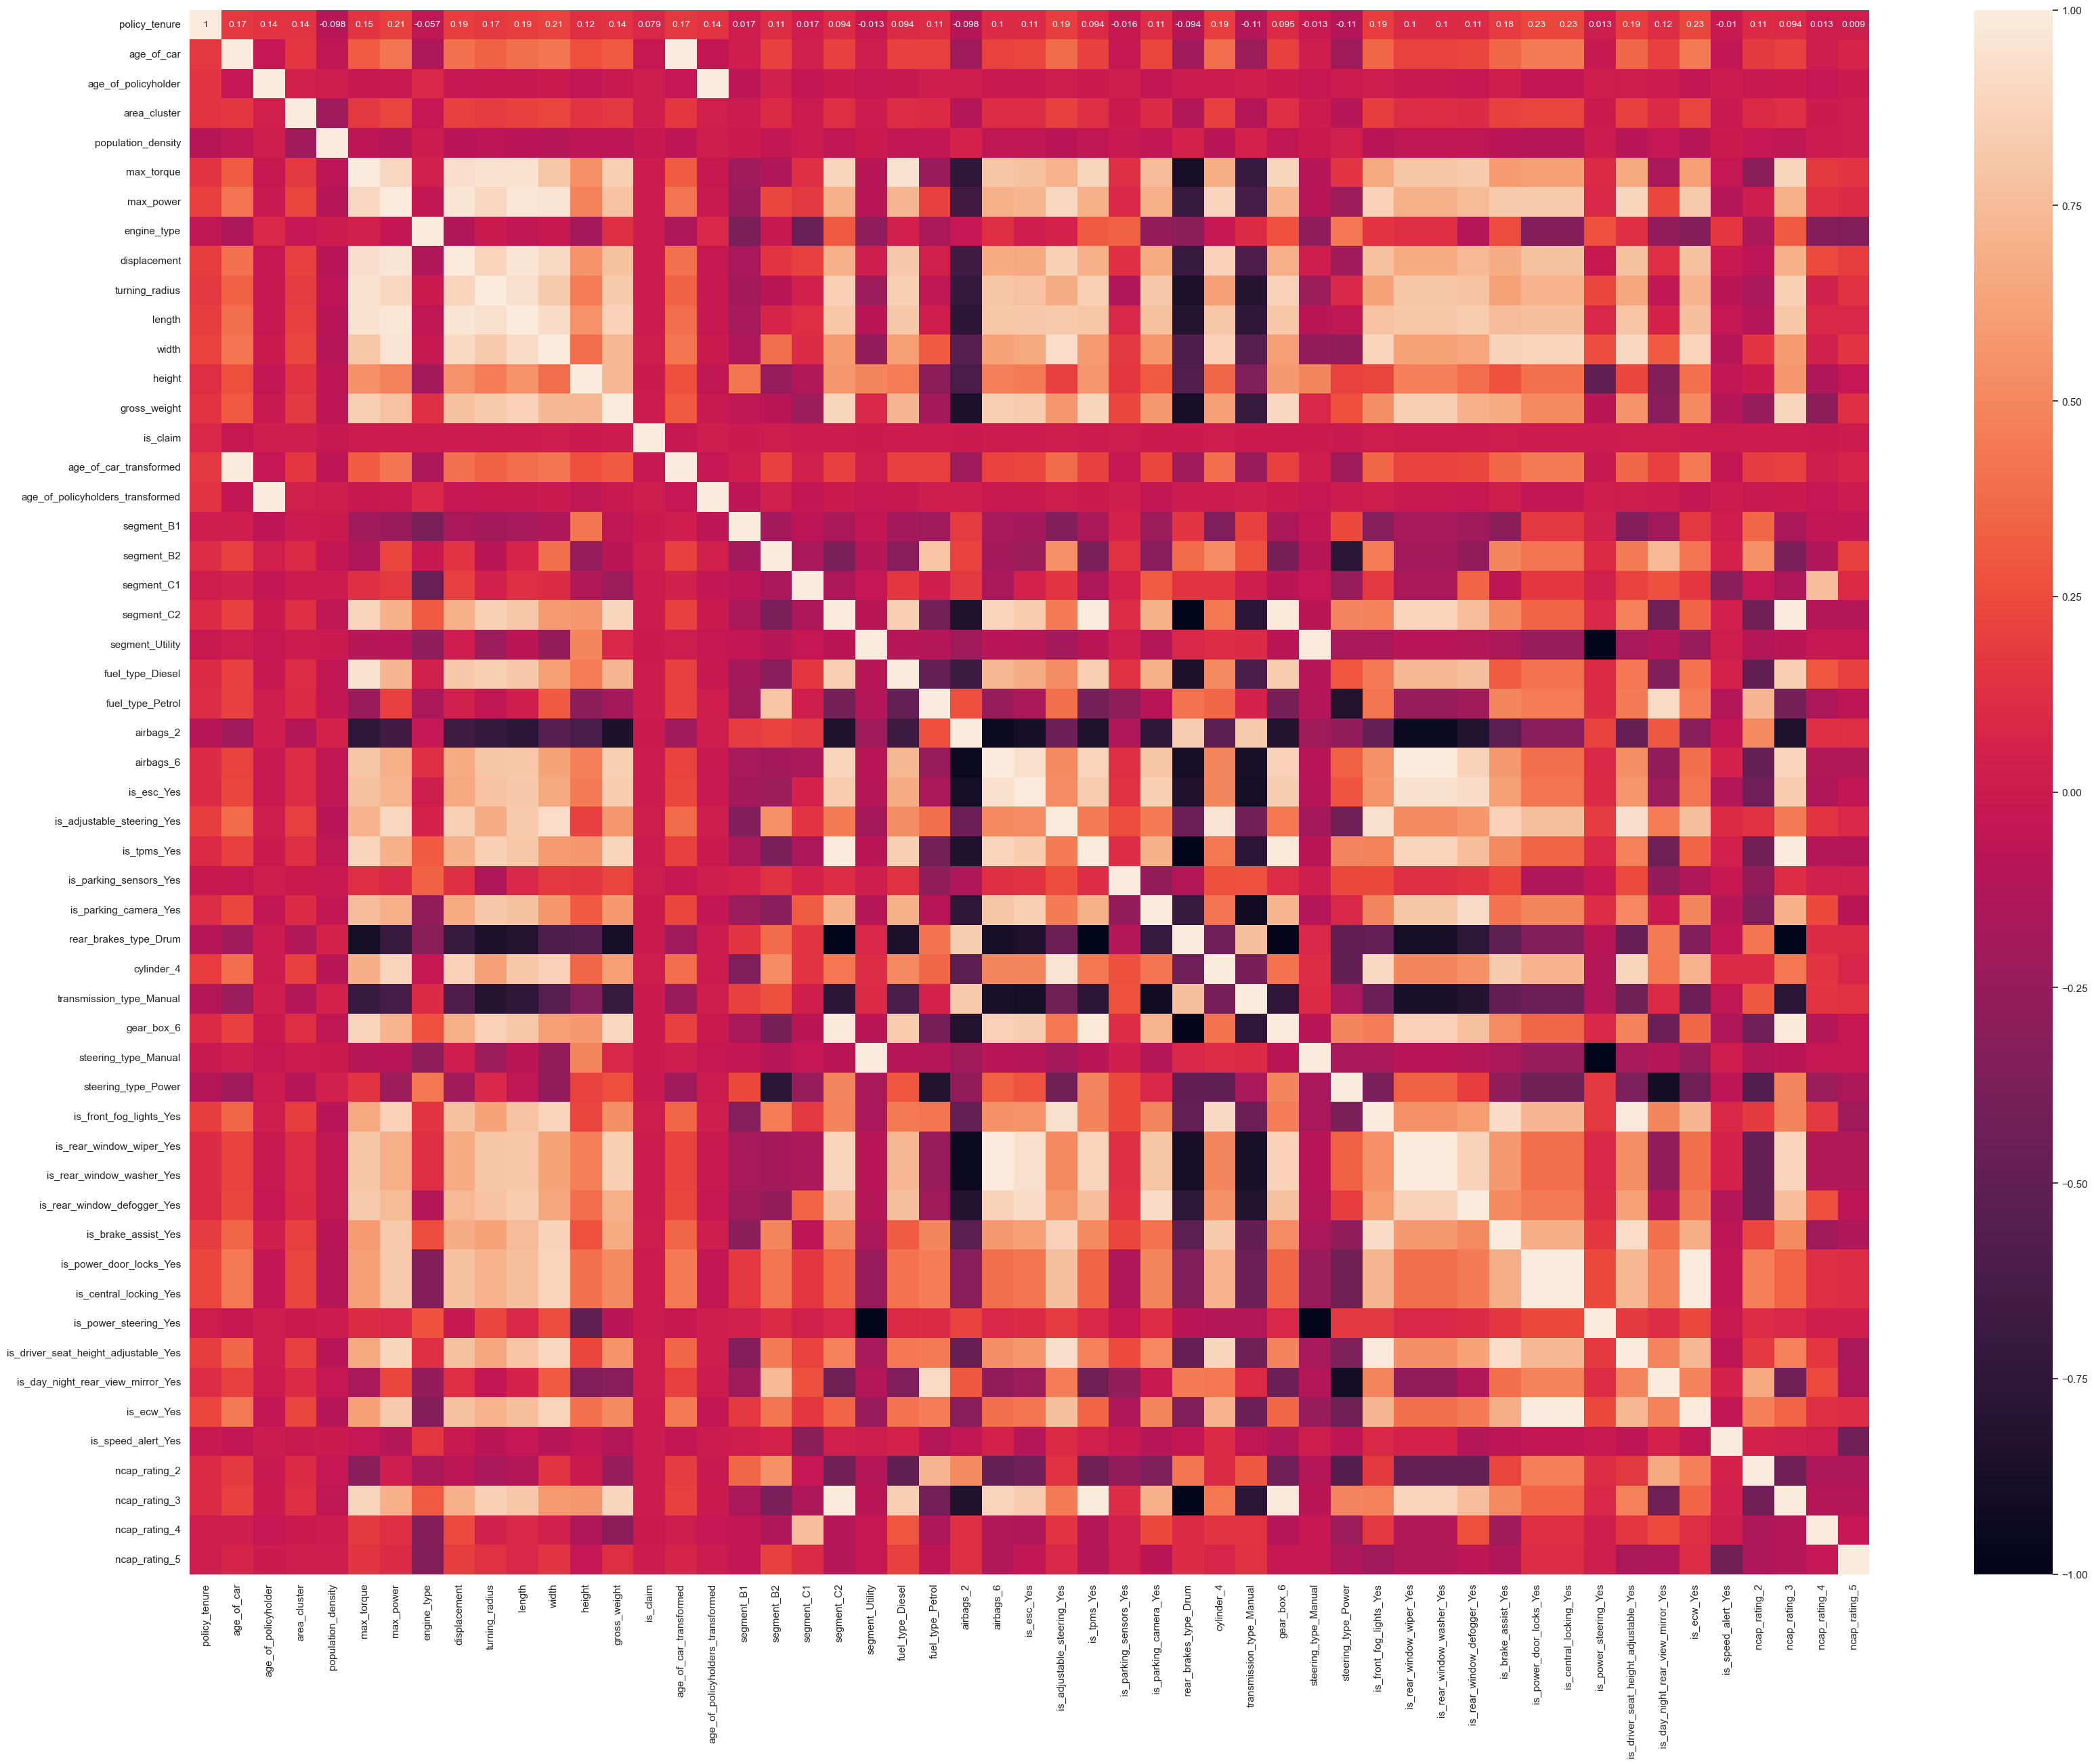

In [105]:
plt.figure(figsize=(40,30))
sns.heatmap(df_treated.corr(),annot=True)

### __Data Splitting__

In [107]:
X = df_treated.drop('is_claim',axis=1)
y = df_treated['is_claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("Split Complete!")
print(f"Original Training Sample Size: {y_train.shape[0]}")

Split Complete!
Original Training Sample Size: 46873


### __Data Scaling__

In [109]:
numeric_features

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'max_torque',
 'max_power',
 'displacement',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight']

In [111]:
df_scaled = df_treated.copy()

scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)

X_test_scaled = scale.fit_transform(X_test)

In [113]:
X_train_scaled

array([[-0.76937805,  2.01159972,  0.01311794, ..., -0.56078411,
        -0.1950557 , -0.18665016],
       [-0.52762391,  0.37931237, -1.08733327, ..., -0.56078411,
        -0.1950557 , -0.18665016],
       [ 1.10050799, -0.7088792 ,  1.11356914, ..., -0.56078411,
        -0.1950557 , -0.18665016],
       ...,
       [-0.5414123 ,  0.92340815,  1.11356914, ..., -0.56078411,
        -0.1950557 , -0.18665016],
       [-0.71073167, -1.07160972,  0.17032525, ..., -0.56078411,
        -0.1950557 , -0.18665016],
       [-0.76730122, -0.16478342,  0.48473988, ..., -0.56078411,
        -0.1950557 , -0.18665016]])

### __Model training and evaluation__

In [115]:
## Dictionary for models (Classification Models)
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
}

# Train and evaluate
results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    # Focus on the metrics for the minority class (1, the 'claim')
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # For models that output probabilities (all of these do)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = np.nan # Not applicable

    results.append((name, acc, prec, rec, f1, roc_auc))

print("\n--- Model Evaluation Results (Classification) ---")
print(f"{'Model':<25} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Score':>10} {'ROC AUC':>10}")
for name, acc, prec, rec, f1, roc_auc in results:
    print(f"{name:<25} {acc:>10.4f} {prec:>10.4f} {rec:>10.4f} {f1:>10.4f} {roc_auc:>10.4f}")

print("\nNote: For classification with imbalanced data (like yours):")
print("* **Recall (Sensitivity):** Crucial for finding claims (Class 1). Higher is usually better.")
print("* **F1-Score:** The harmonic mean of Precision and Recall. A good overall measure.")
print("* **ROC AUC:** Measures the model's ability to distinguish between classes. Closer to 1 is better.")

Training Logistic Regression...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training K-Nearest Neighbors...
Training Decision Tree...
Training Random Forest...
Training XGBoost...

--- Model Evaluation Results (Classification) ---
Model                       Accuracy  Precision     Recall   F1-Score    ROC AUC
Logistic Regression           0.9360     0.0000     0.0000     0.0000     0.5902
K-Nearest Neighbors           0.9340     0.1290     0.0053     0.0102     0.5310
Decision Tree                 0.8707     0.0717     0.0853     0.0779     0.5049
Random Forest                 0.9284     0.0316     0.0040     0.0071     0.5871
XGBoost                       0.9356     0.0000     0.0000     0.0000     0.6201

Note: For classification with imbalanced data (like yours):
* **Recall (Sensitivity):** Crucial for finding claims (Class 1). Higher is usually better.
* **F1-Score:** The harmonic mean of Precision and Recall. A good overall measure.
* **ROC AUC:** Measures the model's ability to distinguish between classes. Closer to 1 is better.


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:44:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


- __Logistic Regression__ performs the best overall, with the highest accuracy 93.6% 

### __Indentifing top 10 features for each type of models__

In [310]:

feature_names = X.columns.tolist()

lr_model = LogisticRegression(random_state=42, solver='liblinear').fit(X_train_scaled, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)

print("\n" + "=" * 50)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

print("\n--- Random Forest Top 10 Feature Importances ---")

# Access the feature_importances_ attribute
rf_importance = pd.Series(rf_model.feature_importances_, index=feature_names)
rf_importance_sorted = rf_importance.sort_values(ascending=False).head(10)
print(rf_importance_sorted)
print("-" * 50)

print("\n--- XGBoost Top 10 Feature Importances ---")

# Access the feature_importances_ attribute
xgb_importance = pd.Series(xgb_model.feature_importances_, index=feature_names)
xgb_importance_sorted = xgb_importance.sort_values(ascending=False).head(10)
print(xgb_importance_sorted)
print("-" * 50)

print("\n--- Logistic Regression Top 10 Absolute Coefficients ---")

# Access the coef_ attribute (lr_model.coef_ is an array of shape (1, n_features) for binary classification)
lr_coefs = pd.Series(lr_model.coef_[0], index=feature_names)

# Absolute value for magnitude (importance)
lr_importance = lr_coefs.abs().sort_values(ascending=False).head(10)

# Create a DataFrame to show both the absolute magnitude and the original sign (direction)
lr_importance_df = pd.DataFrame({
    'Absolute_Coefficient': lr_importance,
    'Original_Coefficient': lr_coefs.loc[lr_importance.index]
})
print(lr_importance_df)
print("-" * 50)


FEATURE IMPORTANCE ANALYSIS

--- Random Forest Top 10 Feature Importances ---
policy_tenure                       0.392667
age_of_policyholder                 0.147397
age_of_policyholders_transformed    0.147194
age_of_car                          0.081952
age_of_car_transformed              0.081173
area_cluster                        0.067278
population_density                  0.065868
engine_type                         0.001237
height                              0.001223
width                               0.001037
dtype: float64
--------------------------------------------------

--- XGBoost Top 10 Feature Importances ---
cylinder_4                    0.073306
transmission_type_Manual      0.045050
max_torque                    0.043906
is_adjustable_steering_Yes    0.040900
length                        0.037450
age_of_car                    0.035590
gross_weight                  0.034534
displacement                  0.034237
policy_tenure                 0.033343
is_brake_a

/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


logistic_regression_feature_importance.png has been generated.

Top 20 Features and Their Coefficients:
                                  Coefficient
policy_tenure                        0.366367
age_of_policyholders_transformed     0.215458
age_of_car                           0.102082
area_cluster                         0.043914
is_speed_alert_Yes                   0.040698
is_parking_sensors_Yes               0.030215
ncap_rating_5                        0.024772
cylinder_4                           0.019780
is_adjustable_steering_Yes           0.019295
segment_C1                           0.017425
is_esc_Yes                           0.014984
is_parking_camera_Yes               -0.009408
steering_type_Power                 -0.009499
gear_box_6                          -0.010063
height                              -0.011355
segment_B1                          -0.015686
ncap_rating_4                       -0.029671
population_density                  -0.046023
age_of_policyholder   

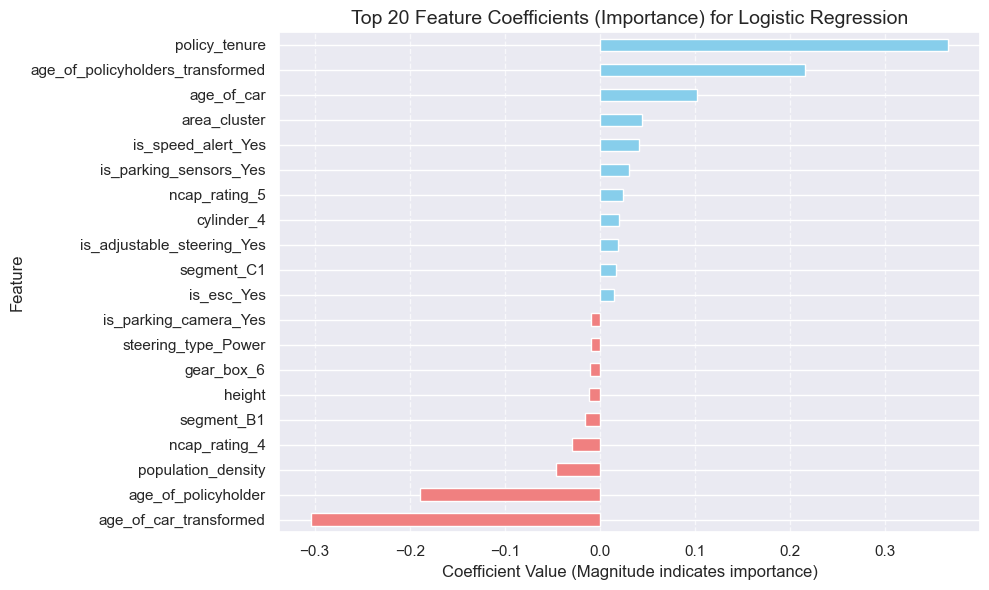

In [316]:
lr_coefs = pd.Series(lr_model.coef_[0], index=feature_names)

# Absolute value for magnitude (importance)
lr_importance = lr_coefs.abs().sort_values(ascending=False).head(20)

top_features_signed_coefs = lr_coefs.loc[lr_importance.index] ### for original coefficient

plt.figure(figsize=(10, 6))
top_features_signed_coefs.sort_values(ascending=True).plot(kind='barh', color=np.where(top_features_signed_coefs.sort_values(ascending=True) > 0, 'skyblue', 'lightcoral'))

plt.title(f'Top 20 Feature Coefficients (Importance) for Logistic Regression', fontsize=14)
plt.xlabel('Coefficient Value (Magnitude indicates importance)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
#plt.savefig('logistic_regression_feature_importance.png')
#plt.close()

print("logistic_regression_feature_importance.png has been generated.")

# Display the top features and their coefficients in the output
print("\nTop 20 Features and Their Coefficients:")
print(pd.DataFrame({
    'Coefficient': top_features_signed_coefs.sort_values(ascending=False)
}))

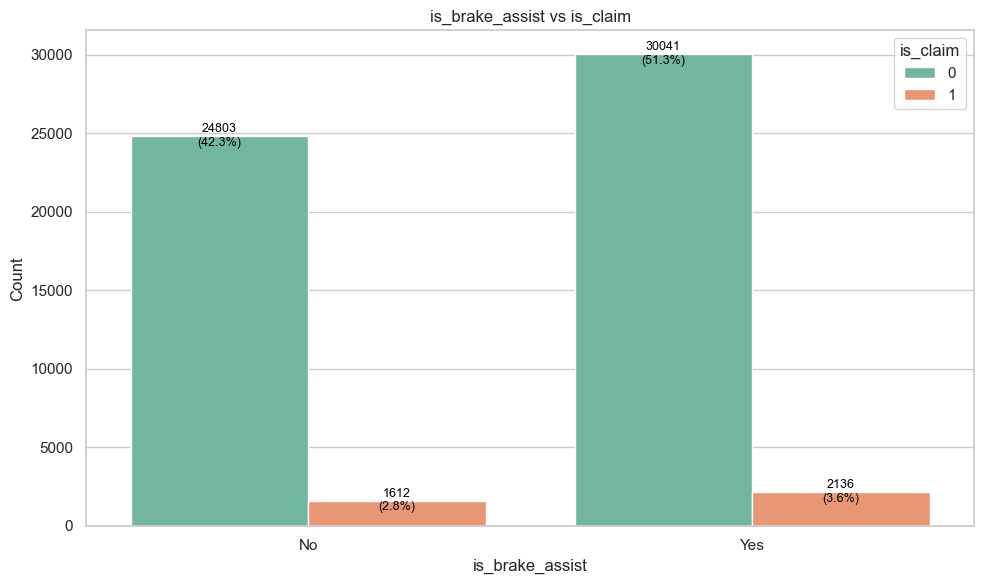

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle # Import for checking bar type

# Assuming 'df' is your DataFrame loaded in the environment
# Create a single figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.set(style="whitegrid")

feature = 'is_brake_assist'

# Create the countplot
sns.countplot(data=df, x=feature, hue=df['is_claim'].astype(str), palette='Set2', ax=ax)

# Set plot title and labels
ax.set_title(f'{feature} vs is_claim')
ax.set_xlabel(feature)
ax.set_ylabel('Count')

# Adding counts and percentages on each bar
total = len(df)
for p in ax.patches:
    # Ensure we are working with the bar patches
    if isinstance(p, Rectangle):
        count = int(p.get_height())
        if count == 0:
            continue
        percentage = 100 * count / total
        ax.text(p.get_x() + p.get_width() / 2.,
                p.get_height() + 3, # Offset the text slightly above the bar
                f'{count}\n({percentage:.1f}%)',
                ha='center', va='center', fontsize=9, color='black')

# Add legend
ax.legend(title='is_claim')

plt.tight_layout()
# Save the figure to a file
plt.savefig('is_esc_vs_is_claim_countplot.png')
# plt.show() # Use plt.show() if running in a local environment

                Predicted Negative Predicted Positive
Actual Negative          TN: 10964              FP: 5
Actual Positive            FN: 750              TP: 0


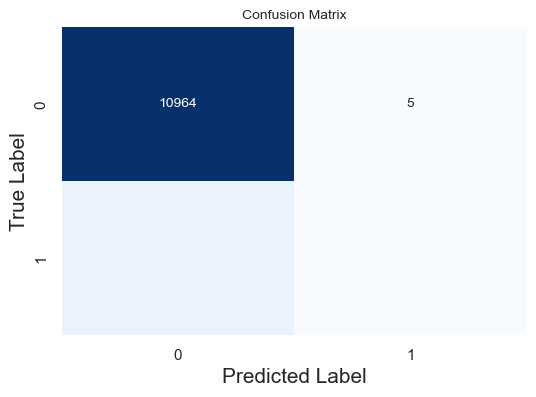

In [123]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

# Create DataFrame
cm_df = pd.DataFrame({
    'Predicted Negative': [f'TN: {tn}', f'FN: {fn}'],
    'Predicted Positive': [f'FP: {fp}', f'TP: {tp}']
}, index=['Actual Negative', 'Actual Positive'])

# Display DataFrame
print(cm_df)
# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()